# Milk adulteration

```
题目： 基于拉曼光谱和k最近邻回归的羊奶掺假判别方法

摘要 Abstract
近年来，随着人们对营养及健康的重视，人们在乳制品的选择方面更倾向于选择羊奶来代替牛奶。然而，一些不良商家为了牟取暴利，在羊奶中掺假掺杂。采用拉曼光谱分析法检测羊奶中牛奶的含量，以0%、1%、2%、5%、10%、20%、40%、 60%、80%、100%的掺假率构建不同的样本。以掺假率作为预测目标，设计了基于K-最近邻回归模型的掺假判别模型。该模型与常用的线性回归和支持向量回归器等进行了对比，取得了预测最优效果。在测试集上的预测R2效应量分别为。。。。本文提供了一种快速、高效、准确的羊奶掺假的判别技术。。。 

图文摘要 Graphical abstract
放整体研究和方法框架

1.简介 Introduction
背景、羊奶vs牛奶，羊奶掺假问题、现有判别技术。。。，引出拉曼光谱的优势

2.材料与方法 Materials and methods
2.1.样品采集与制备 Samples collection and preparation
羊奶牛奶的来源、如何掺假
2.2拉曼光谱分析 Raman spectral analysis
介绍仪器
数据集描述性统计； 绘制不同掺假比例羊奶牛奶的平均波形
2.3预测模型
KNR原理介绍，特点/优势/缺点等

3.结果与讨论 Results and discussion


3.1数据分割 Data Splitting
Stratified Kennardstone Split

3.2 线性回归 / Ridge / LASSO / SVR / RF / KNR
介绍，分析
超参数如何选择

4.结论 Conclusions
什么方法效果比较好、
回扣背景问题，研究的意义

致谢 Acknowledgments
参考文献 References

```

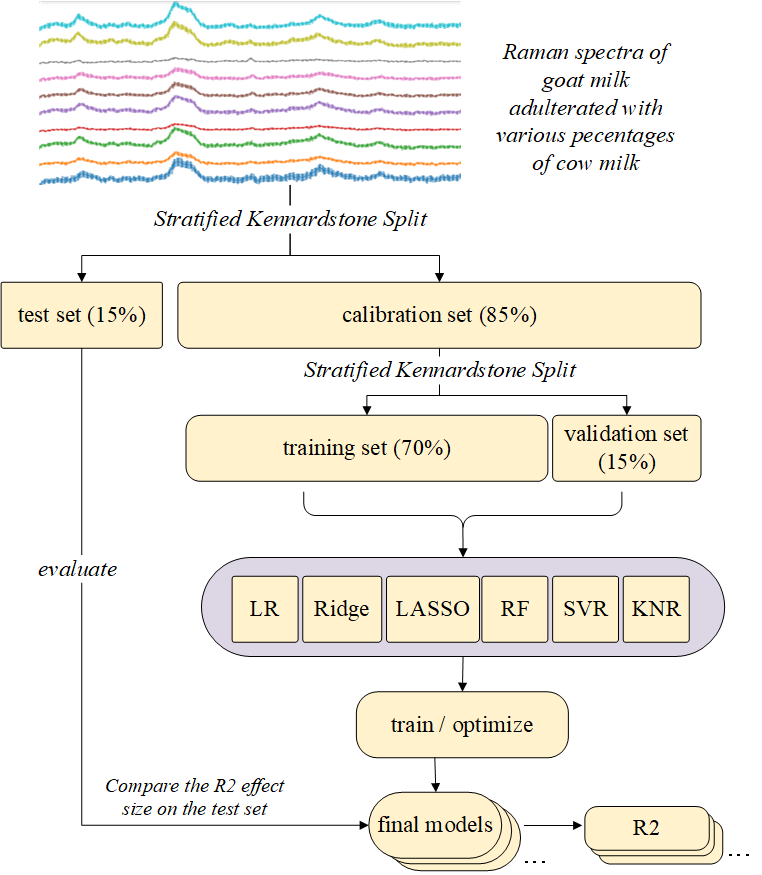

比例更新

In [1]:
import qsi
qsi.__version__

'1.4.0'

load dataset from adulteration.CSV
X.shape (500, 1300)  y.shape (500,)


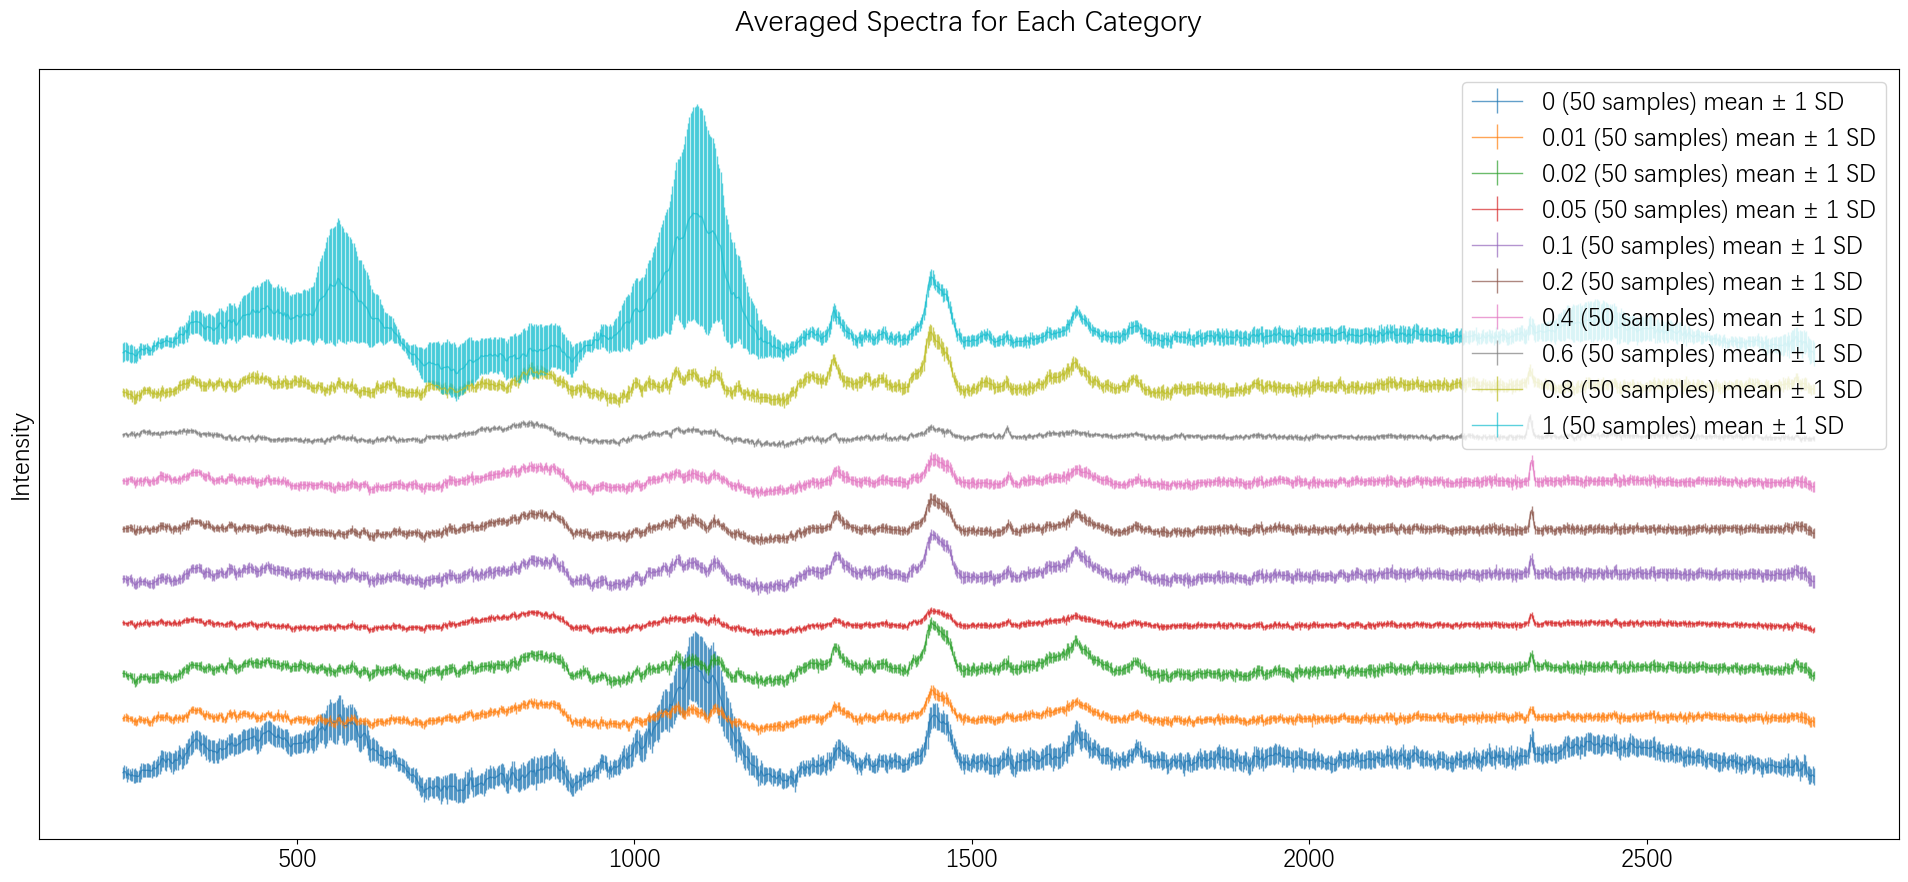

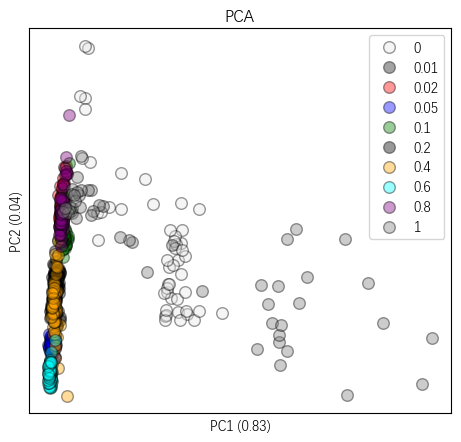

Raman spectra of goat milk adultered with different percentages of cow milk.

yangniu0% label=0
yangniu1% label=1
yangniu2% label=2
yangniu5% label=3
yangniu10% label=4
yangniu20% label=5
yangniu40% label=6
yangniu60% label=7
yangniu80% label=8
yangniu100% label=9

"Goat milk is higher in fat and calories when compared to cow milk, and it also contains more protein, vitamins and minerals. 
When compared, goat milk also has about 1% less lactose than cow milk."
goats' milk is almost five times as expensive as cows' milk.  

The goat milk is from M company (Mengyang) and the cow milk is from T company (Telunsu).
No module named 'rpy2'


窗函数预处理（max）: binning window width =  1 / 0.2 = 5


消除基线飘移: baseline removal (regularization = 10000000.0, residual penalty asymetry = 0.01)


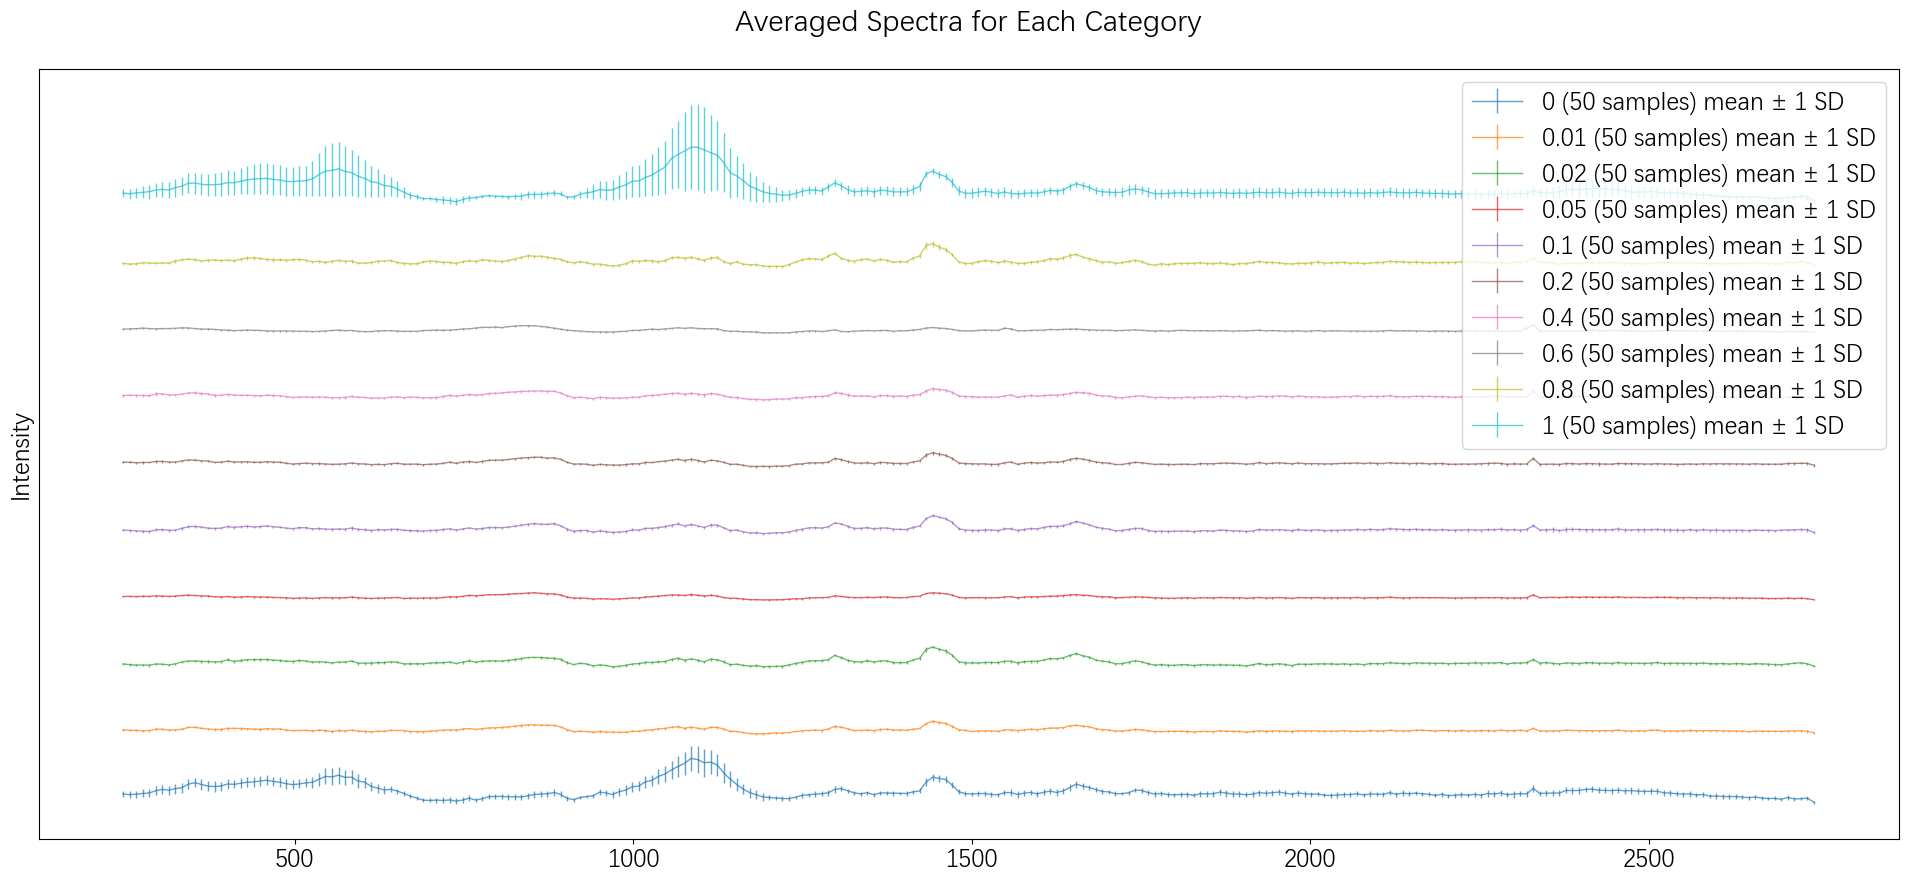

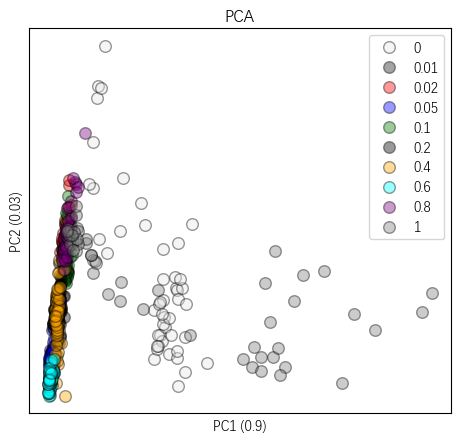

In [2]:
from qsi import io
X, yc, X_names, _, labels = io.load_dataset('milk_adulteration', x_range = list(range(100,1400)), shift=200)

from qsi import pipeline
X, X_names = pipeline.preprocess_dataset(X, X_names, pres = [('max', 0.2),('baseline_removal', (1e7, 1e-2))])
io.draw_class_average(X, yc, X_names, labels=labels, SD=1, shift=800)
_ = io.scatter_plot(X, yc, labels=labels)

In [3]:
labels

['0', '0.01', '0.02', '0.05', '0.1', '0.2', '0.4', '0.6', '0.8', '1']

In [4]:
import numpy as np
y = np.asfarray(np.array(labels)[yc]) # convert class label to continuous value

# Stratified Kennardstone Split

保持分割后的数据集在y上的分布相同

参考： https://hxhc.xyz/post/kennardstone-spxy/

In [5]:
from sklearn.utils import shuffle
X, yc = shuffle(X, yc)

In [6]:
from qsi.io.pre import stratified_kennardstone_split # kennardstone_split

X_cal, X_test, y_cal, y_test = stratified_kennardstone_split(X, yc, 0.15)
X_train, X_val, y_train, y_val = stratified_kennardstone_split(X_cal, y_cal, 0.2)
y_train = np.asfarray(np.array(labels)[y_train])
y_val = np.asfarray(np.array(labels)[y_val])
y_test = np.asfarray(np.array(labels)[y_test])

In [7]:
y_train.shape, y_val.shape, y_test.shape

((340,), (80,), (80,))

# Regression

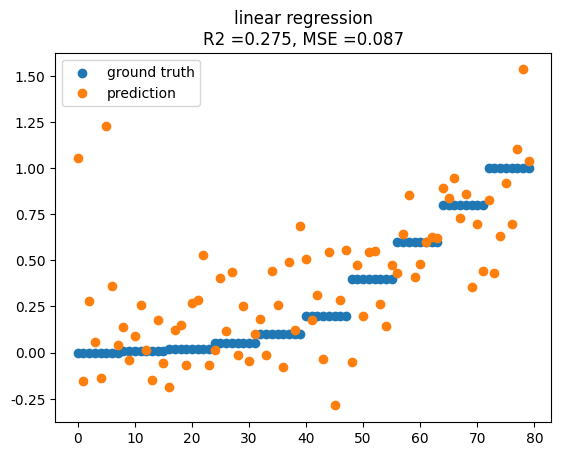

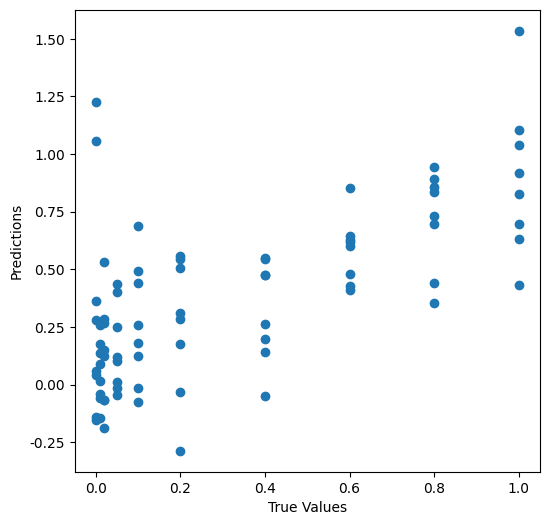

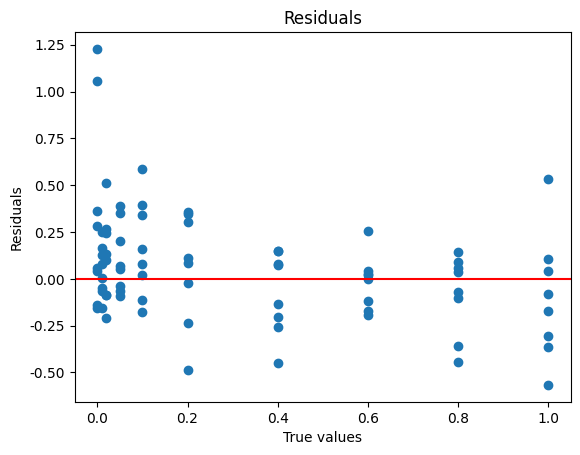

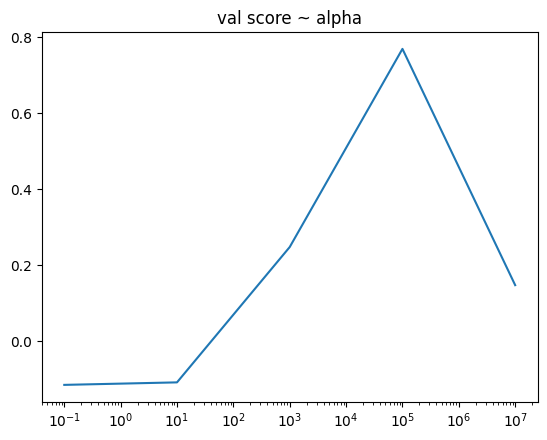

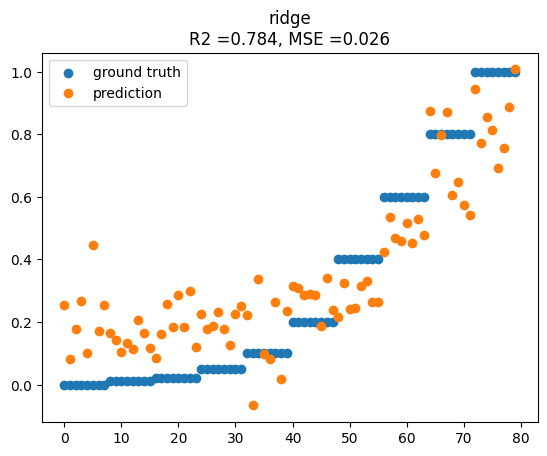

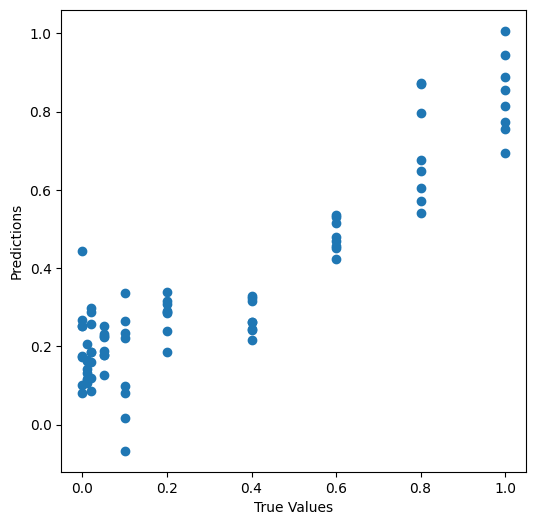

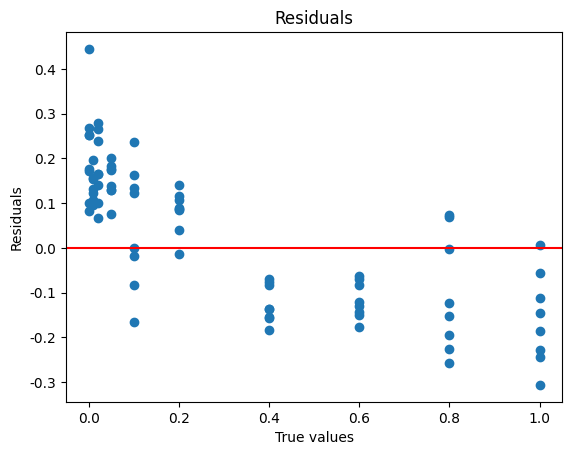

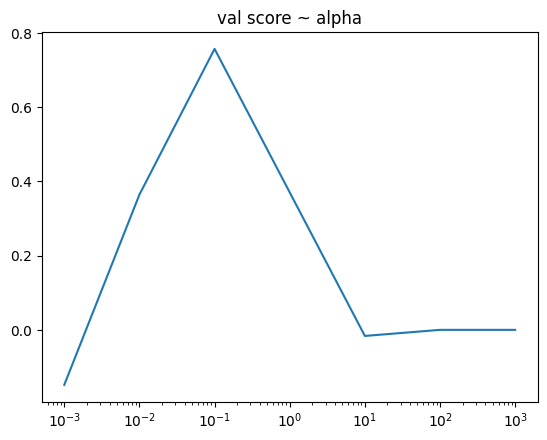

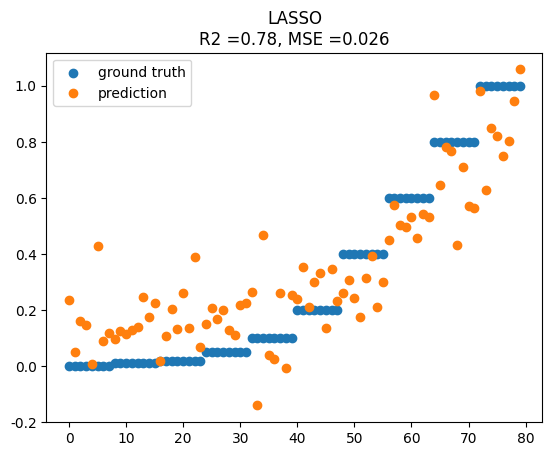

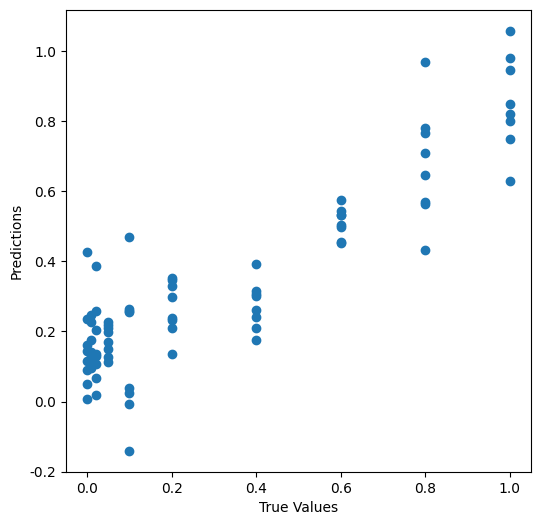

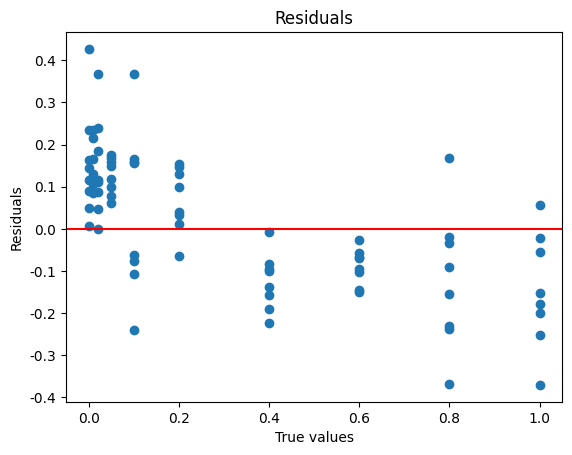

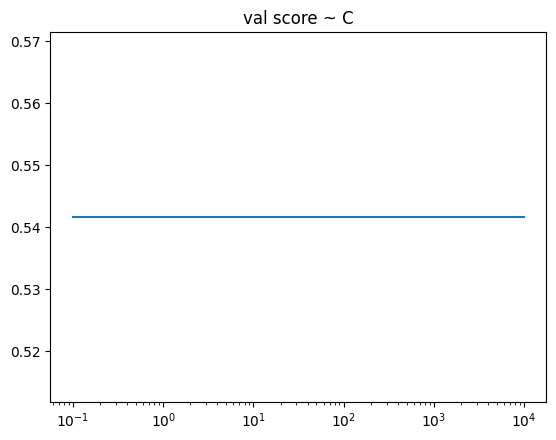

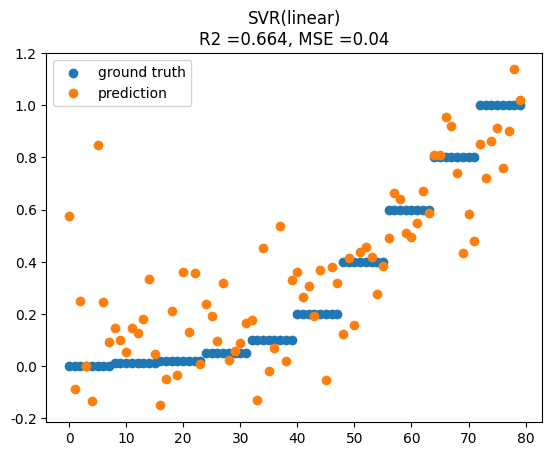

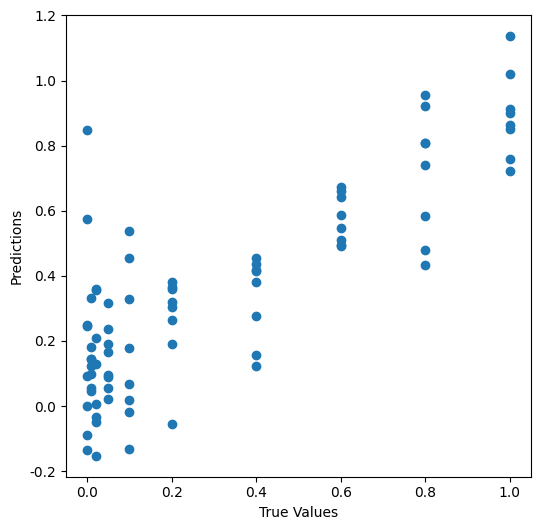

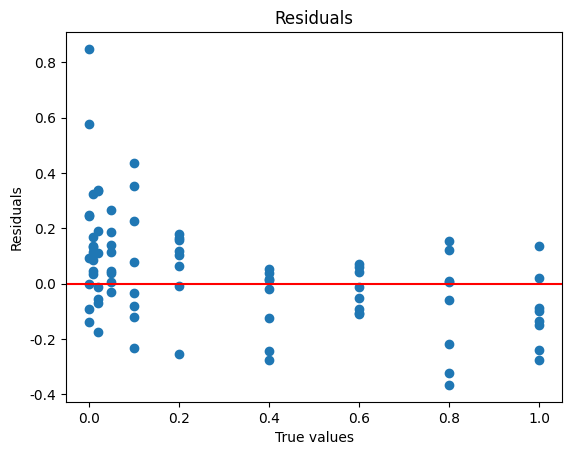

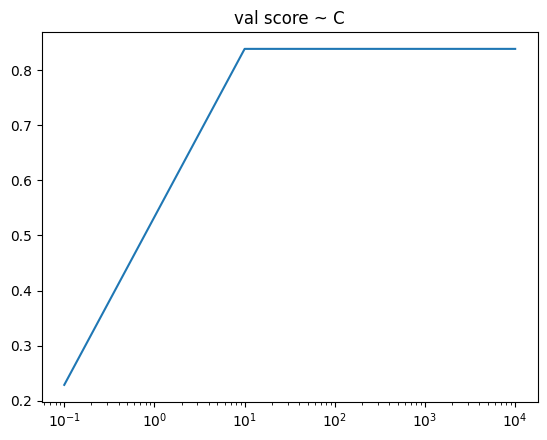

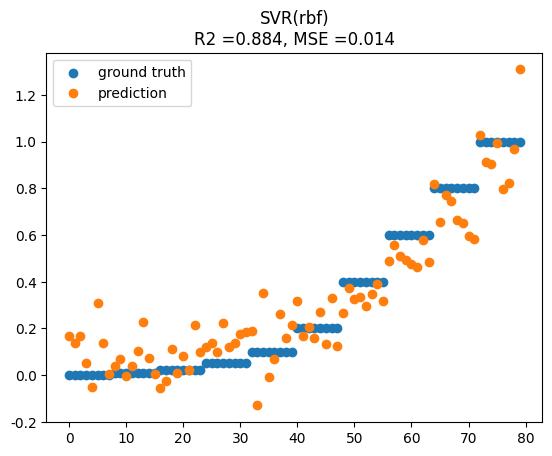

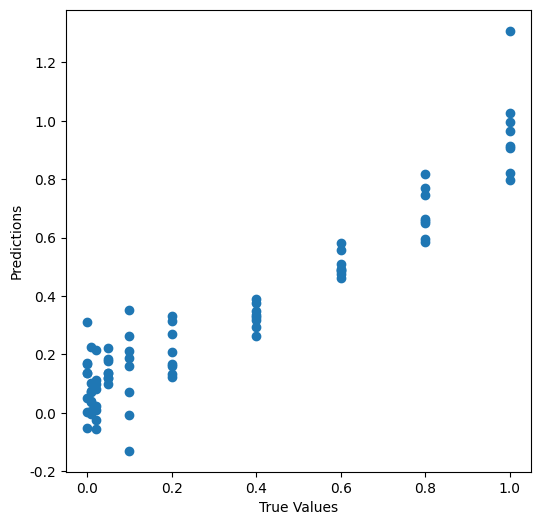

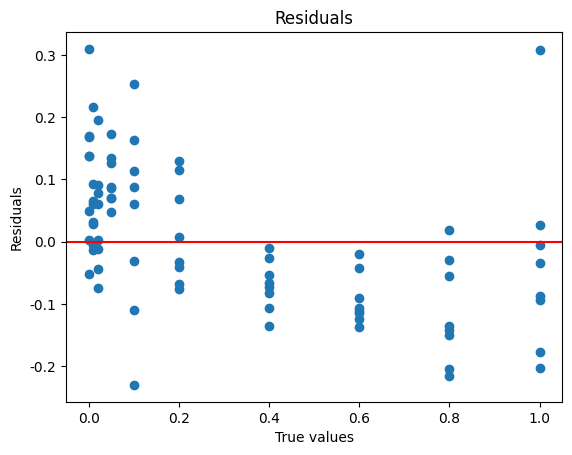

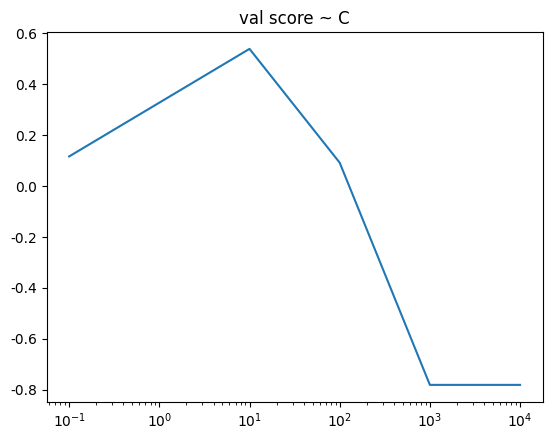

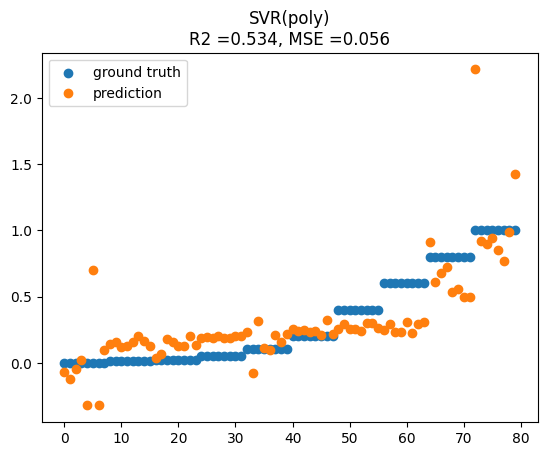

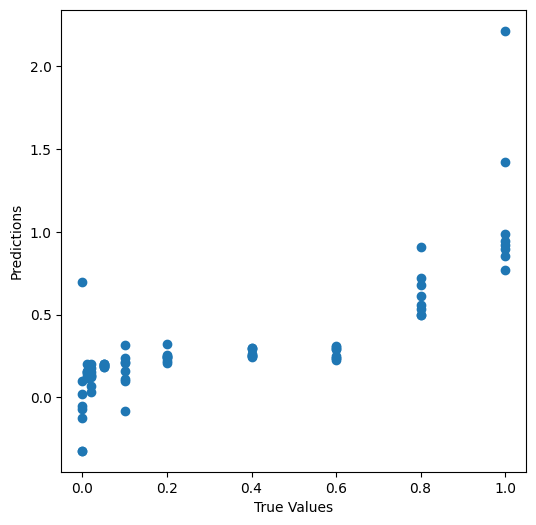

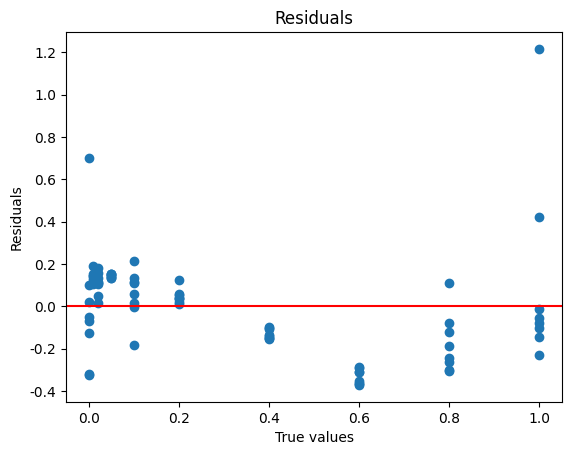

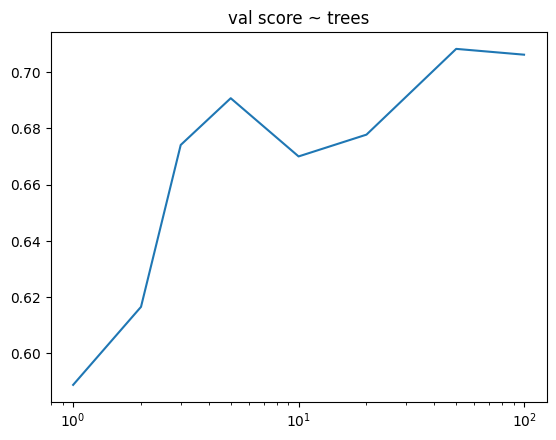

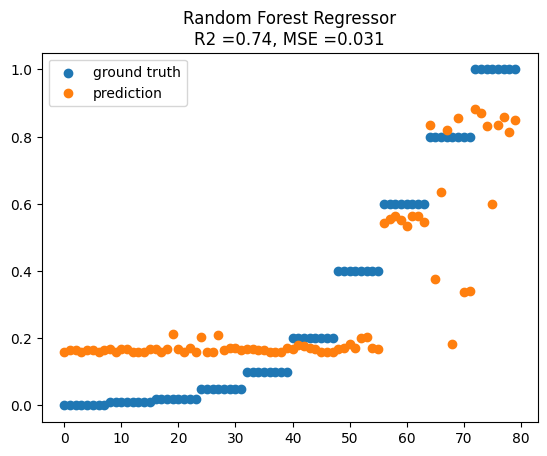

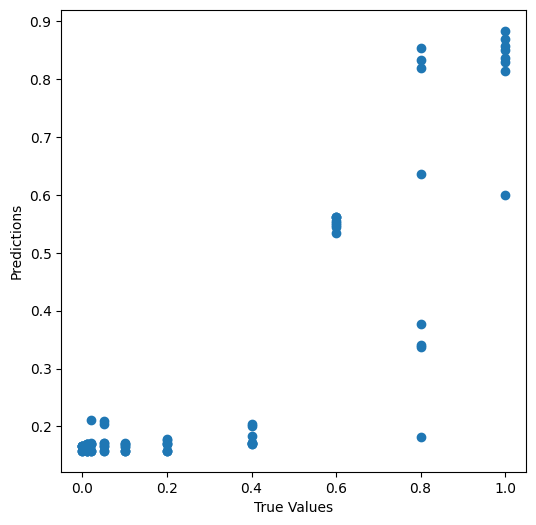

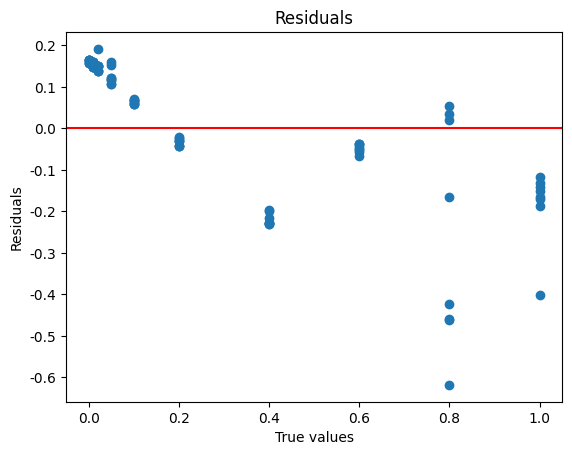

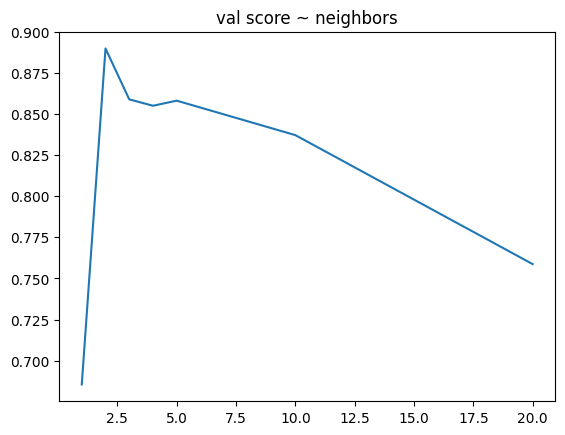

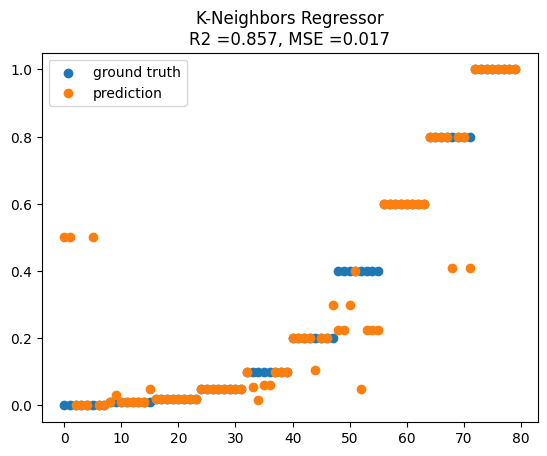

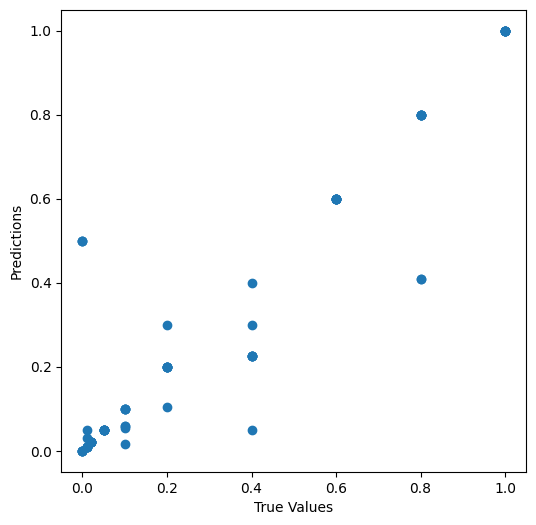

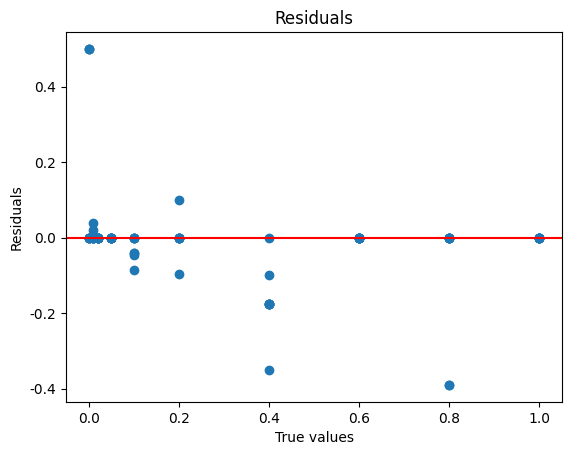

25it [00:11,  2.22it/s]


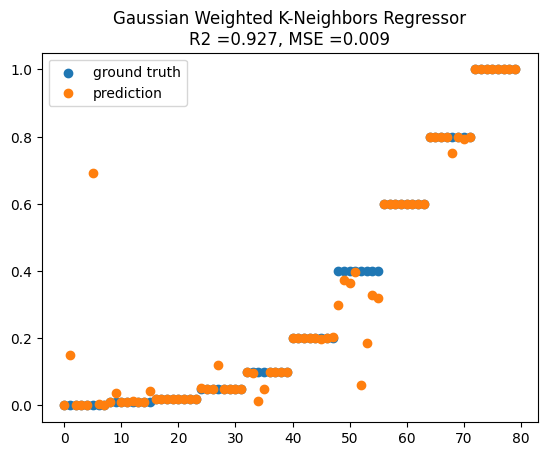

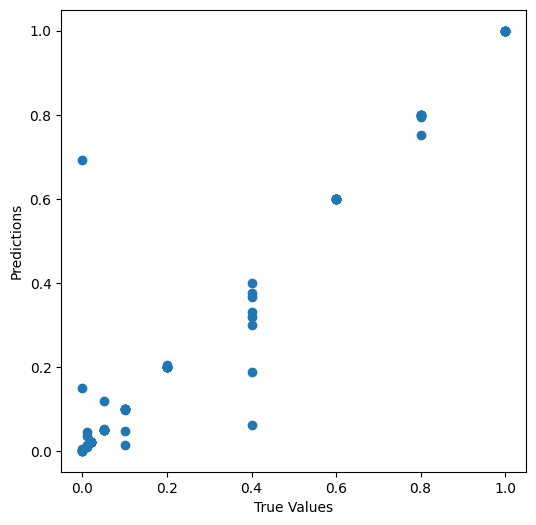

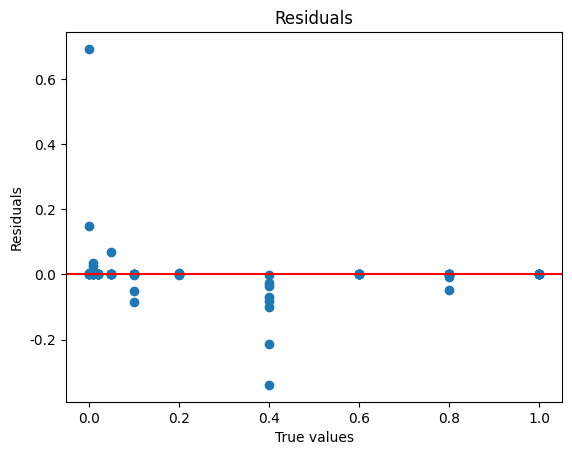

In [8]:
from qsi.regress import run_regressors
run_regressors(X_train, X_val, X_test, y_train, y_val, y_test)

# Case Study II: Mix milk powder and coconut milk powder with different ratios, from 100% milk powder to 100% coconut milk powder in increments of 10%

X.shape (220, 601)  y.shape (220,)


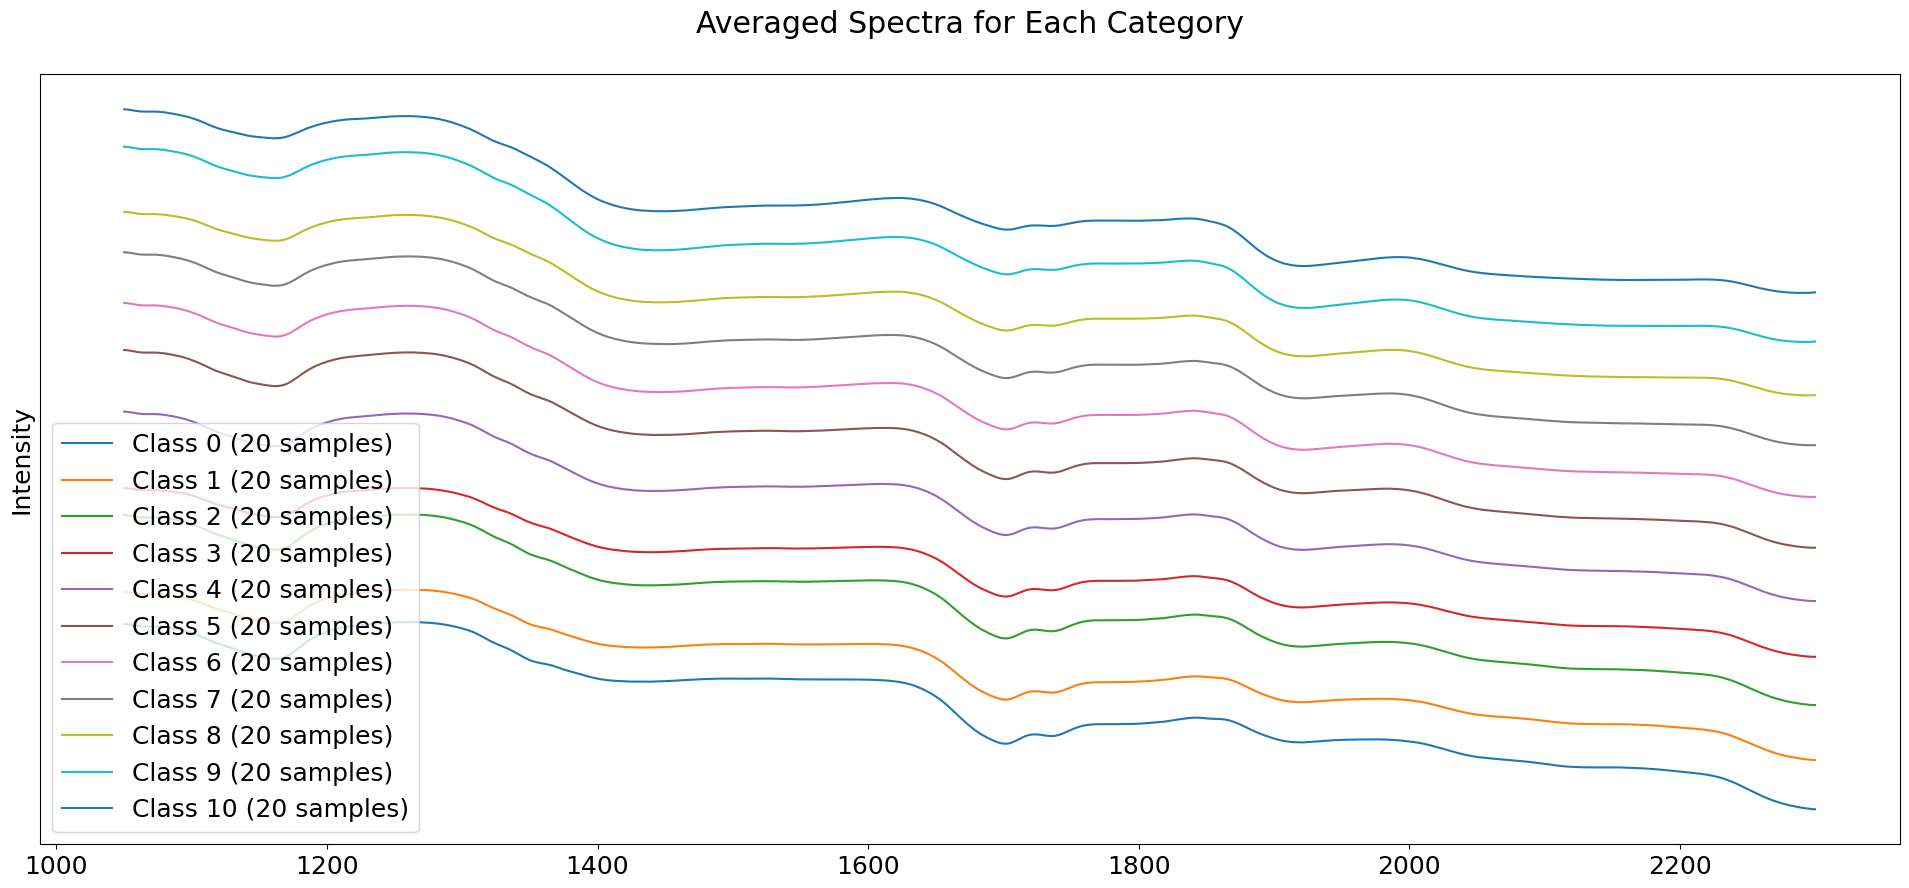

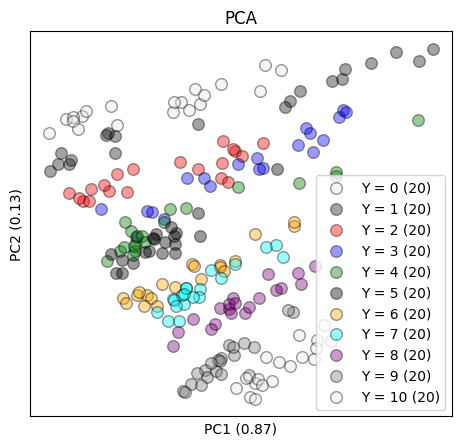

In [9]:
from qsi import io
X, yc, X_names, labels = io.peek_dataset('milk_coconut_powder.csv', SD=0, shift=.2)

In [10]:
import numpy as np
y = yc*10 # convert class label to percentage

from qsi.io.pre import stratified_kennardstone_split # kennardstone_split
X_cal, X_test, y_cal, y_test = stratified_kennardstone_split(X, y, 0.15)
X_train, X_val, y_train, y_val = stratified_kennardstone_split(X_cal, y_cal, 0.2)

X_train.shape, X_val.shape, X_test.shape

((154, 601), (33, 601), (33, 601))

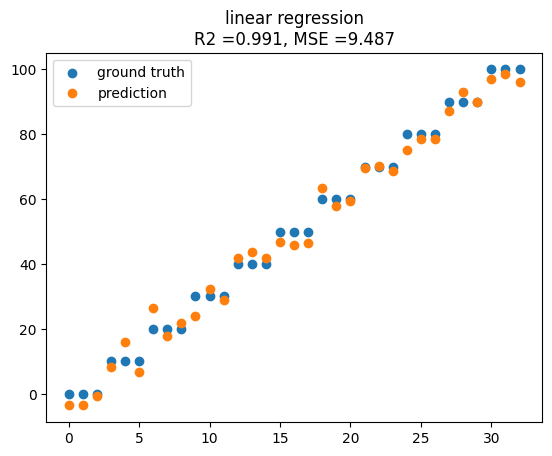

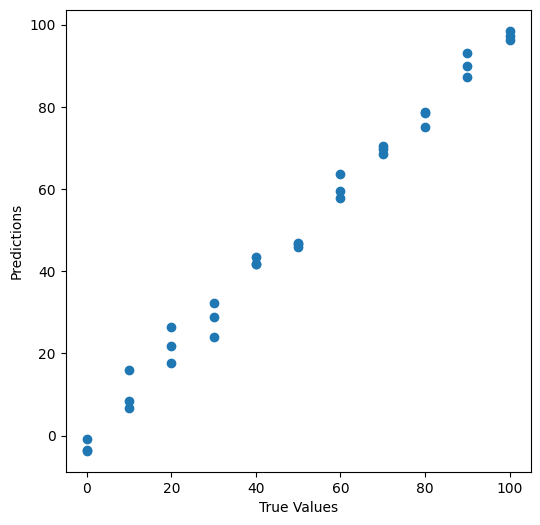

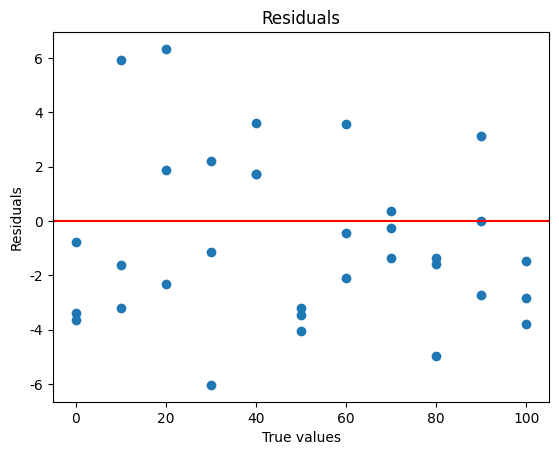

Training set R2:  1.0
Test set R2: 0.9905127390719315


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ dense (Dense)                      │ (None, 10)                    │       6,020 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_1 (Dense)                    │ (None, 1)                     │          11 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 6,031 (23.56 KB)

 Trainable params: 6,031 (23.56 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3529.8132
Epoch 2/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3181.4929
Epoch 3/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3203.6631
Epoch 4/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3152.1760
Epoch 5/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2960.4207
Epoch 6/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3212.8677
Epoch 7/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2636.6890
Epoch 8/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2692.2627
Epoch 9/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2312.8420
Epoch 10/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 2773.7415
Epoch 11/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3138.8242
Epoch 12/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2803.7710
Epoch 13/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2622.7207
Epoch 14/500
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2340.3892
Epoch 15/500
77/77 ━━━━━━━━

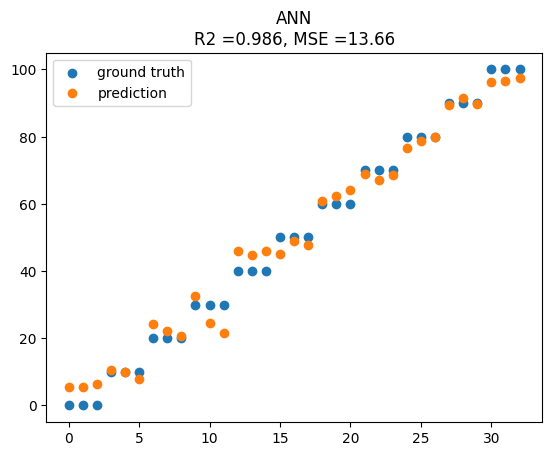

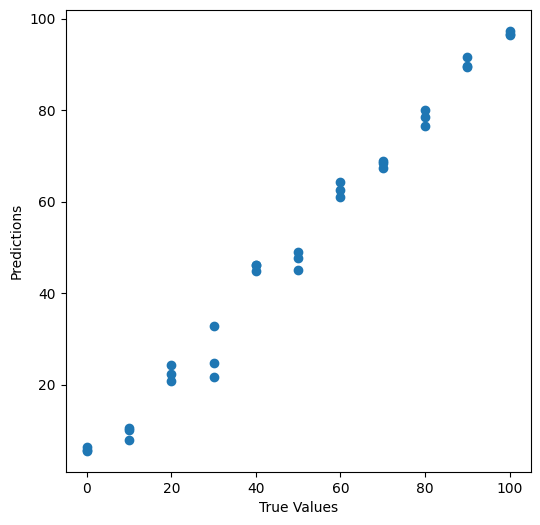

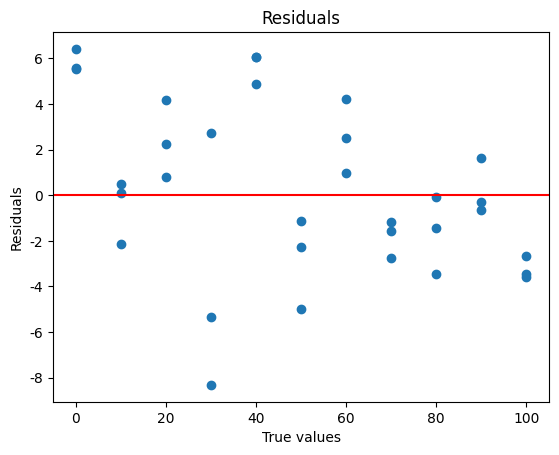

Training set R2:  0.9843777918426896
Test set R2: 0.9863398309565067


In [11]:
from qsi.regress import run_regressors

run_regressors(X_train, X_val, X_test, y_train, y_val, y_test, clfs=['linear regression', 'ANN'], verbose=True, order = 'asc')

LR already perform quite well on the dataset.

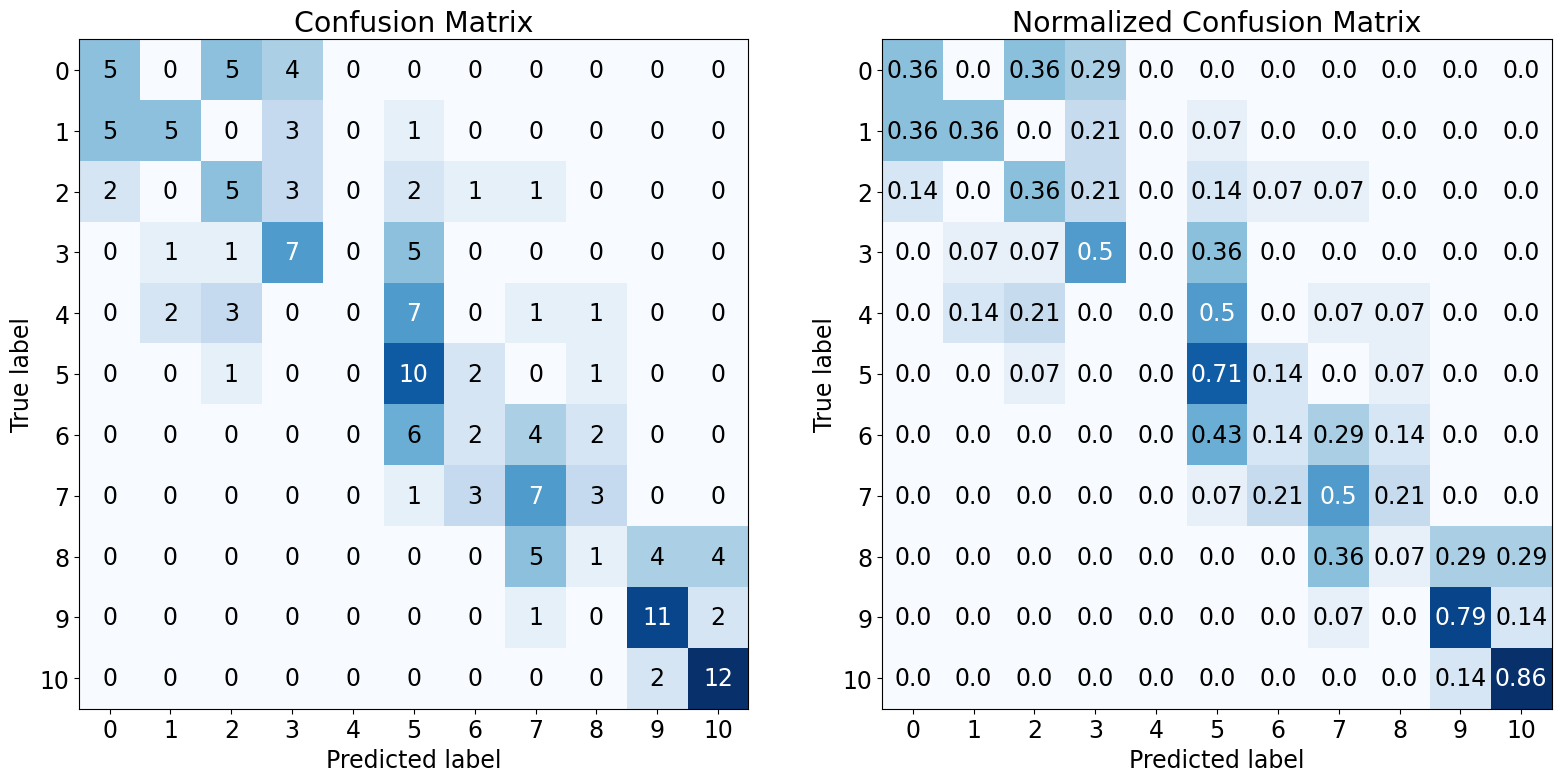

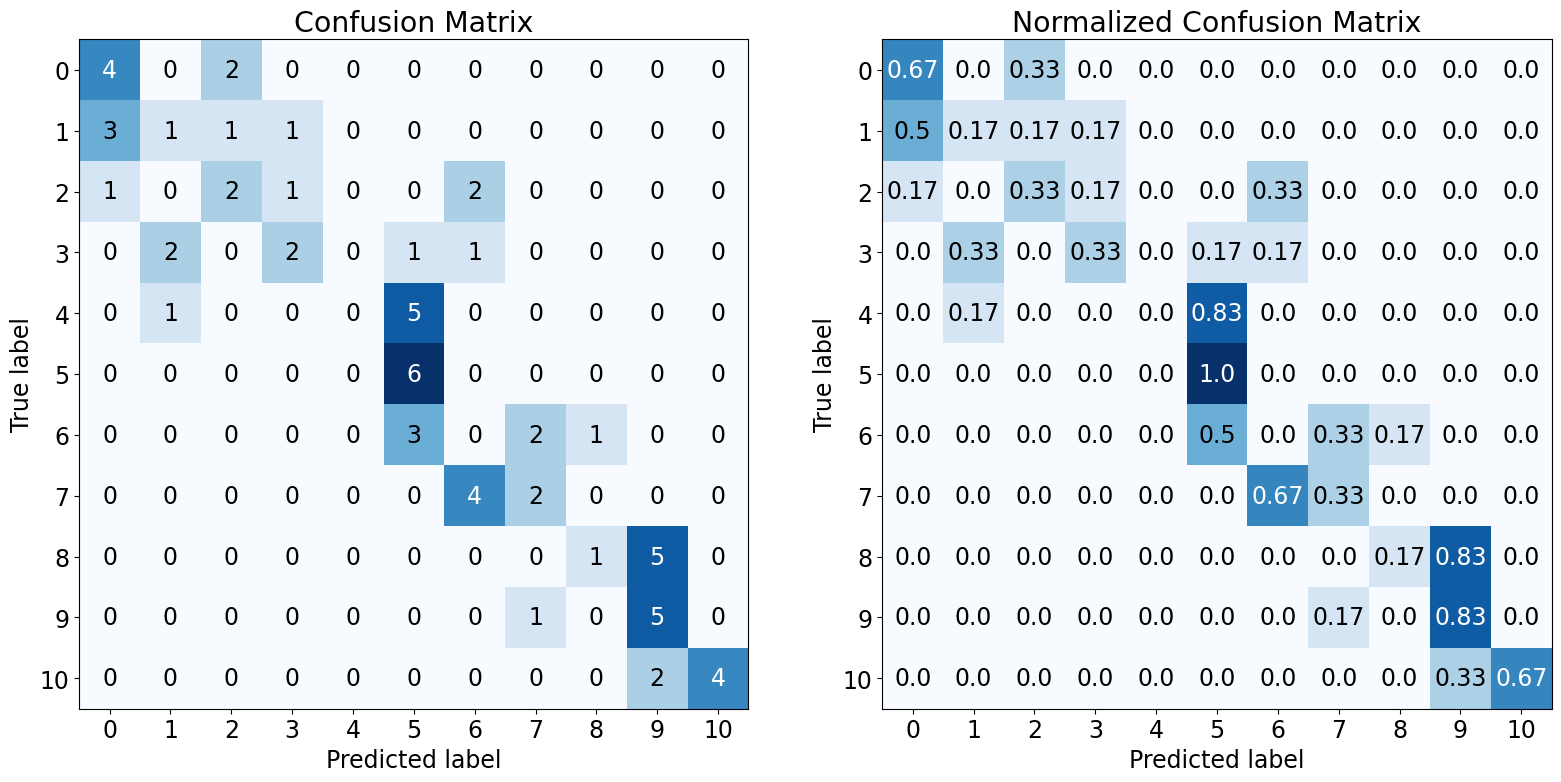

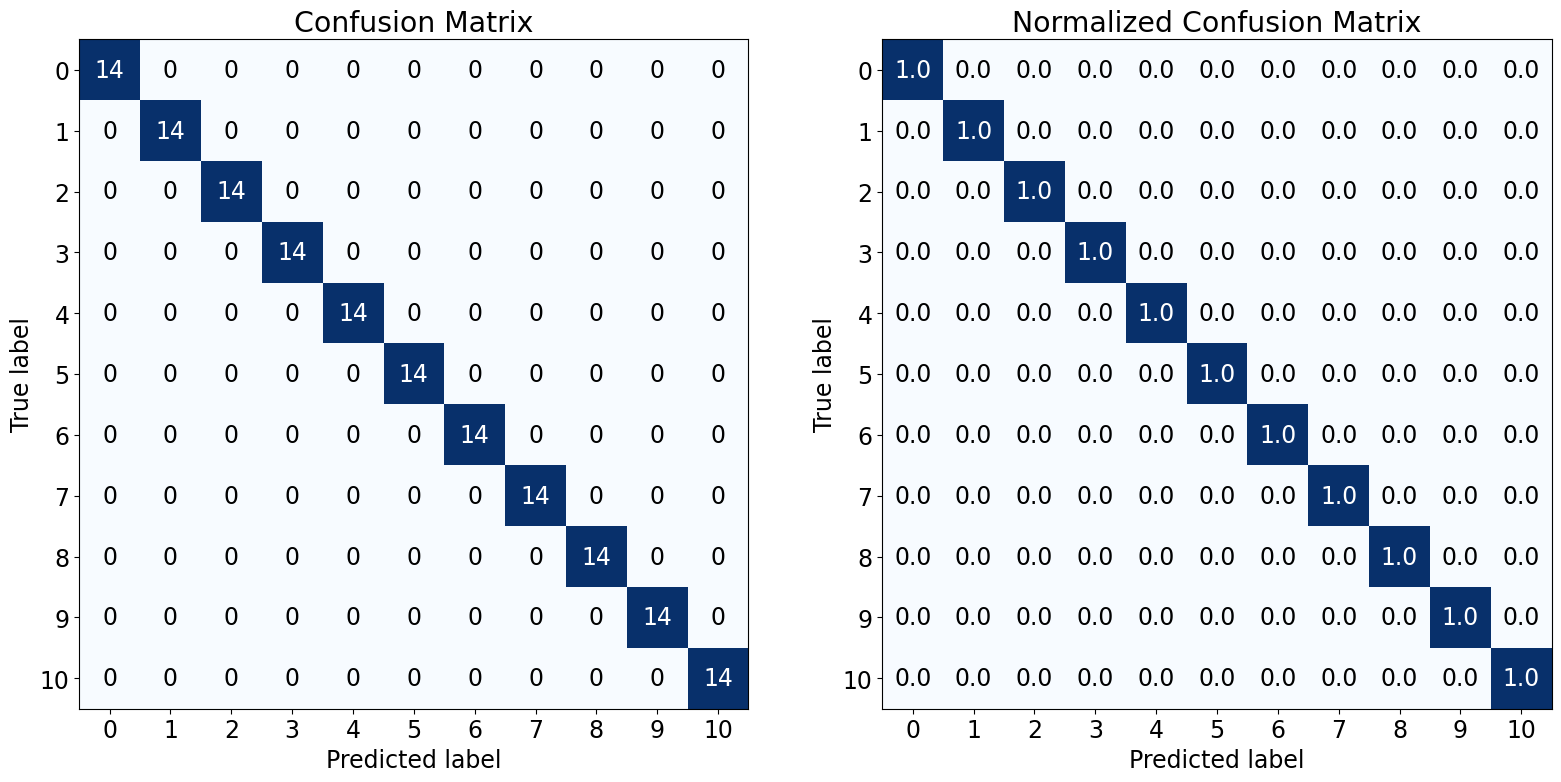

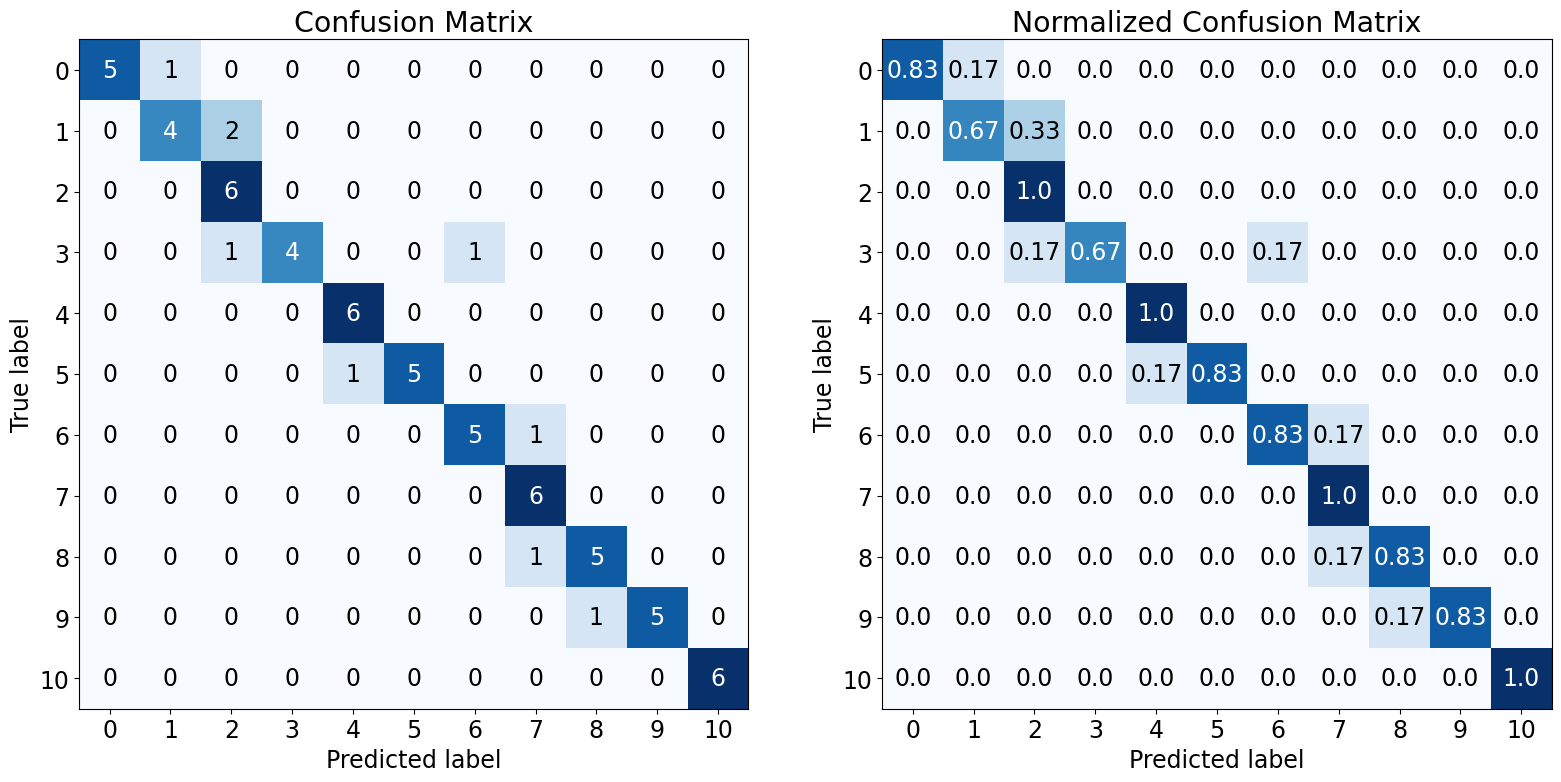

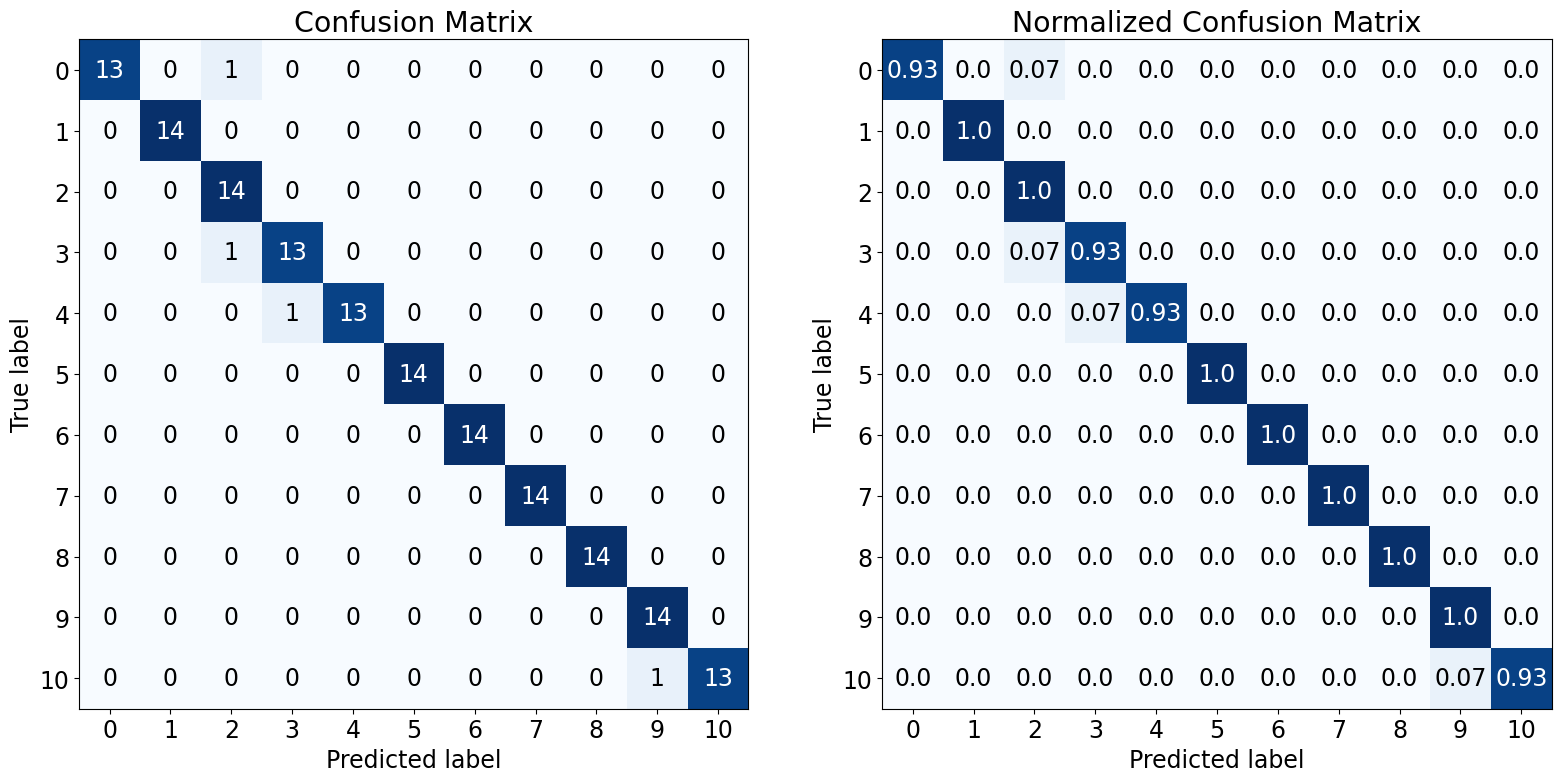

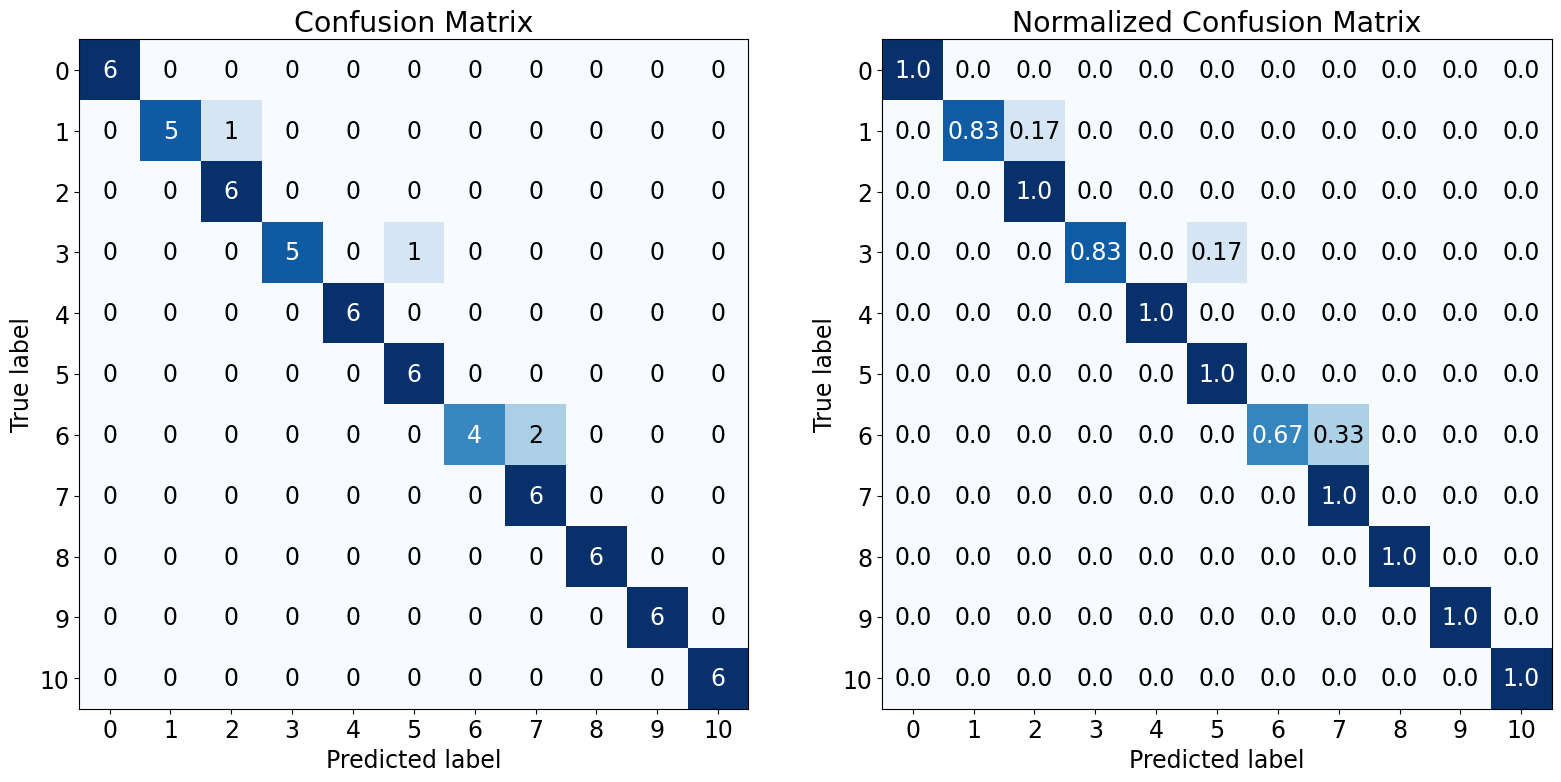

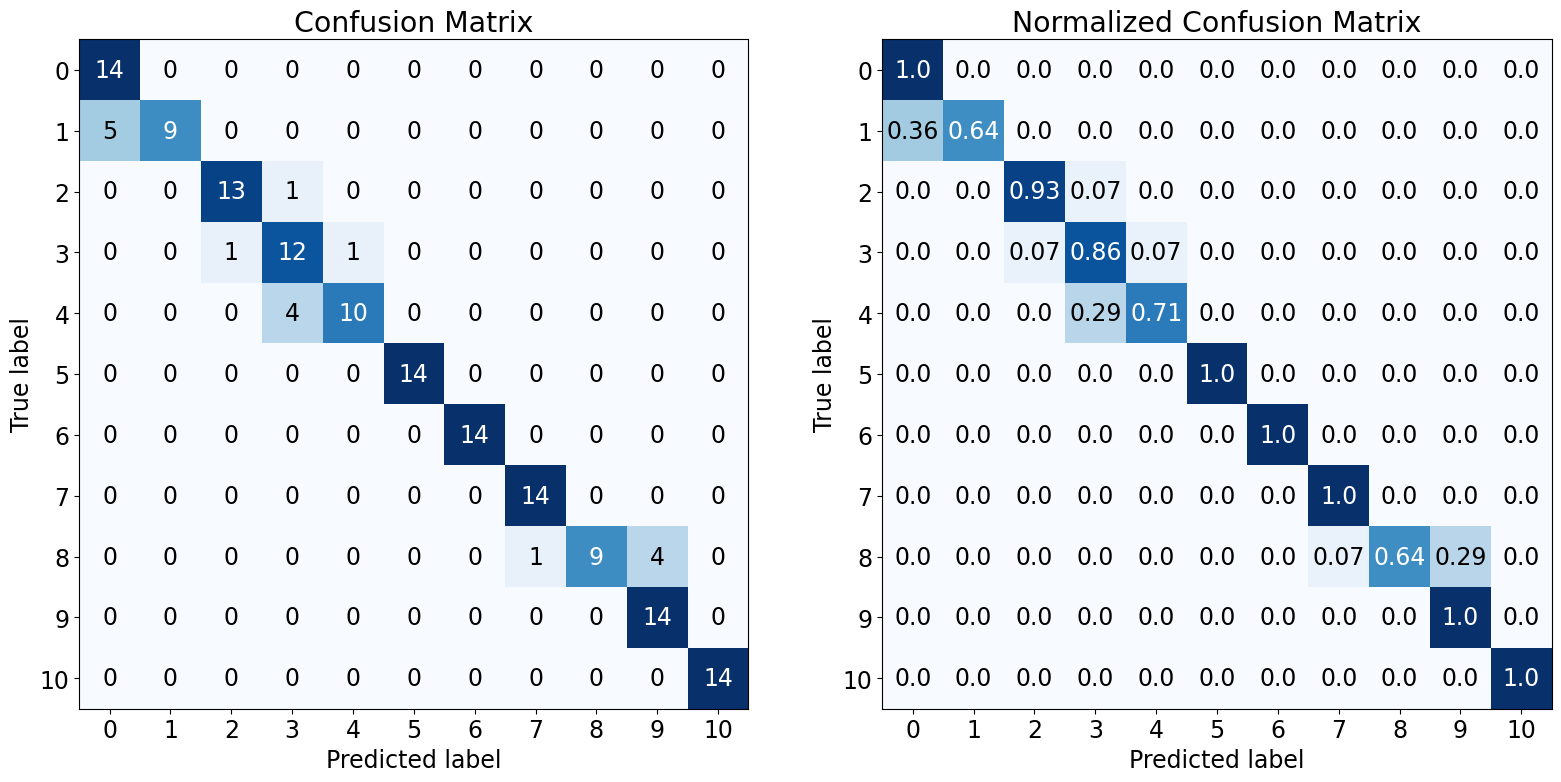

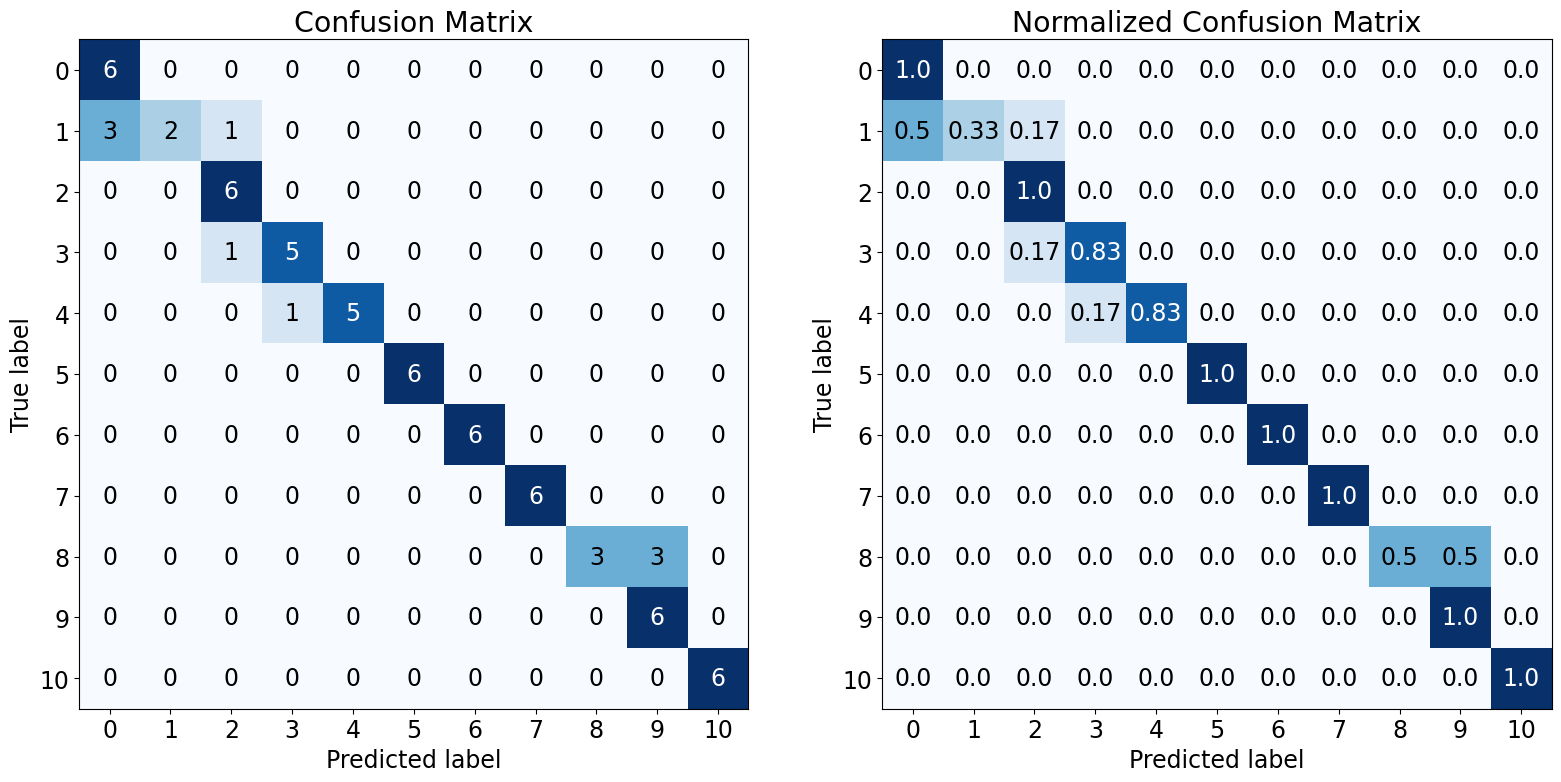

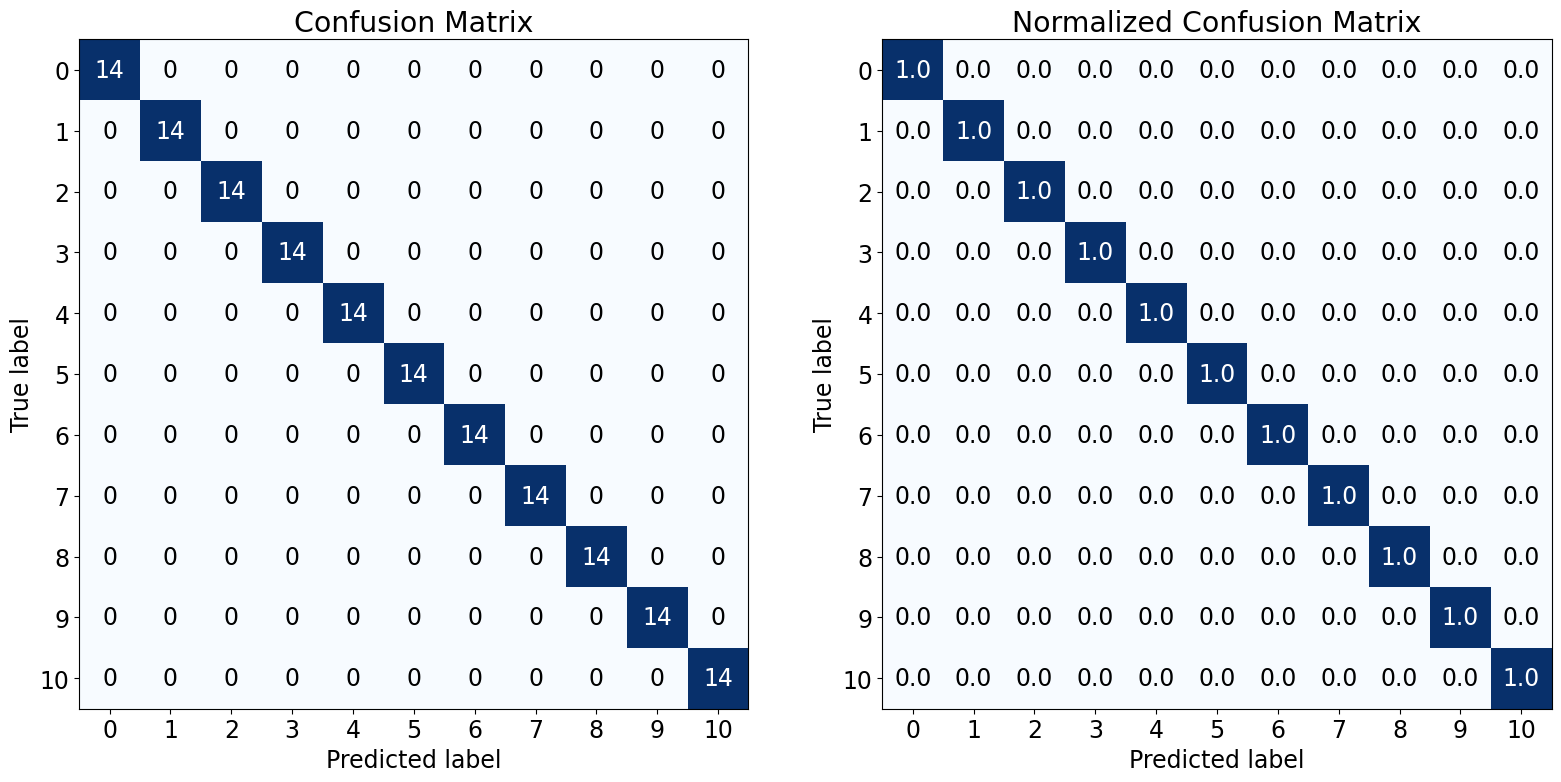

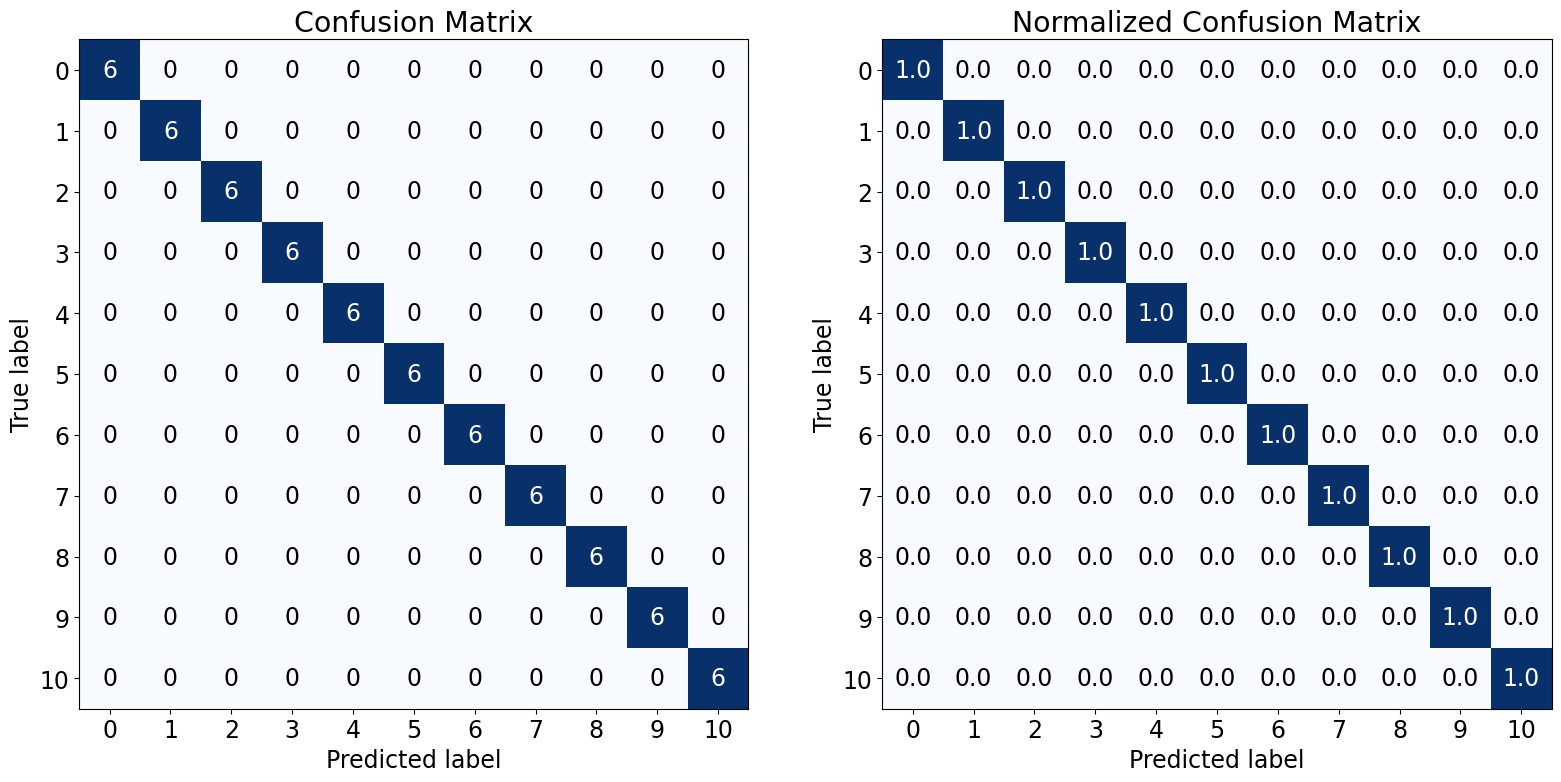

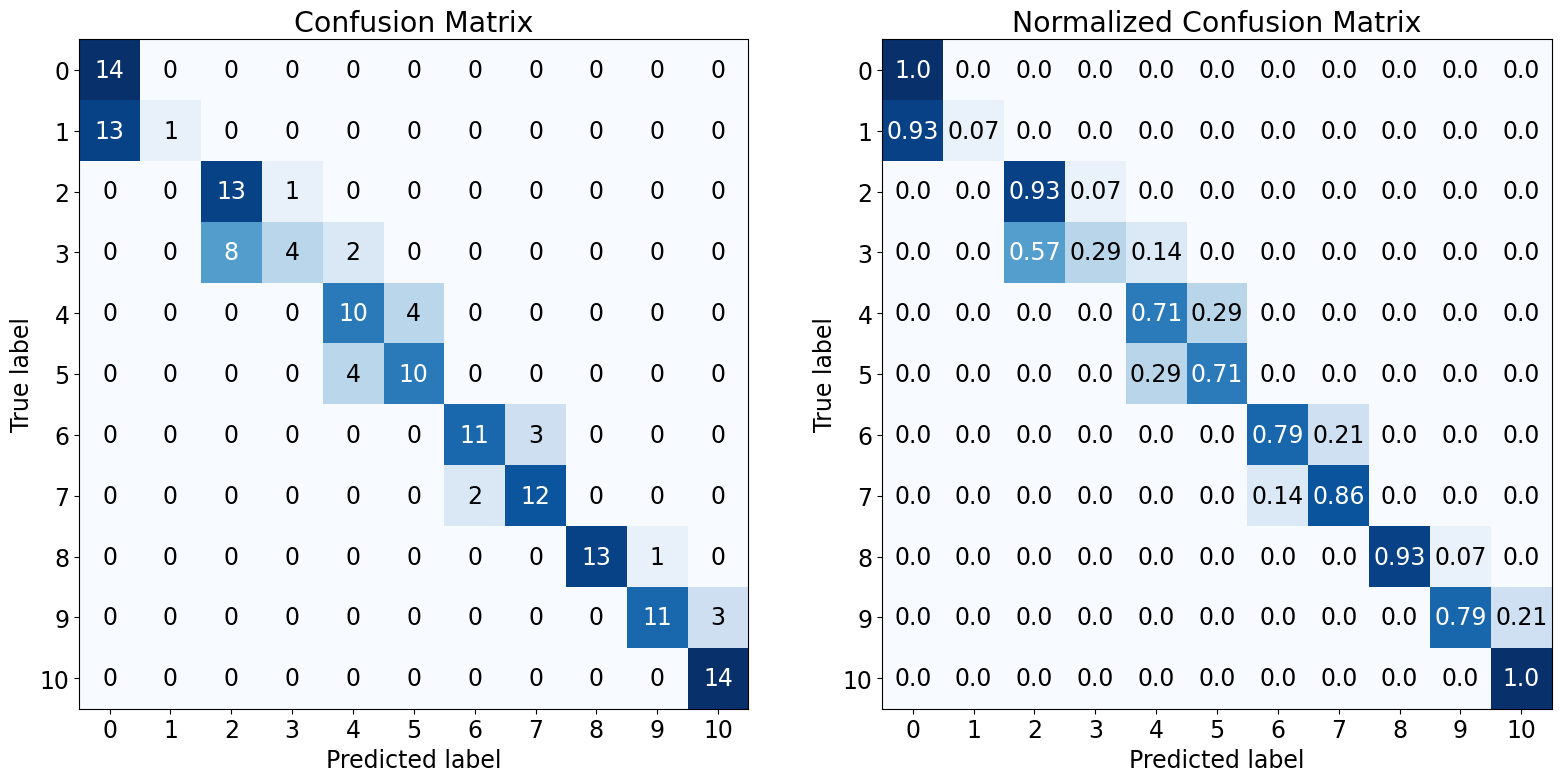

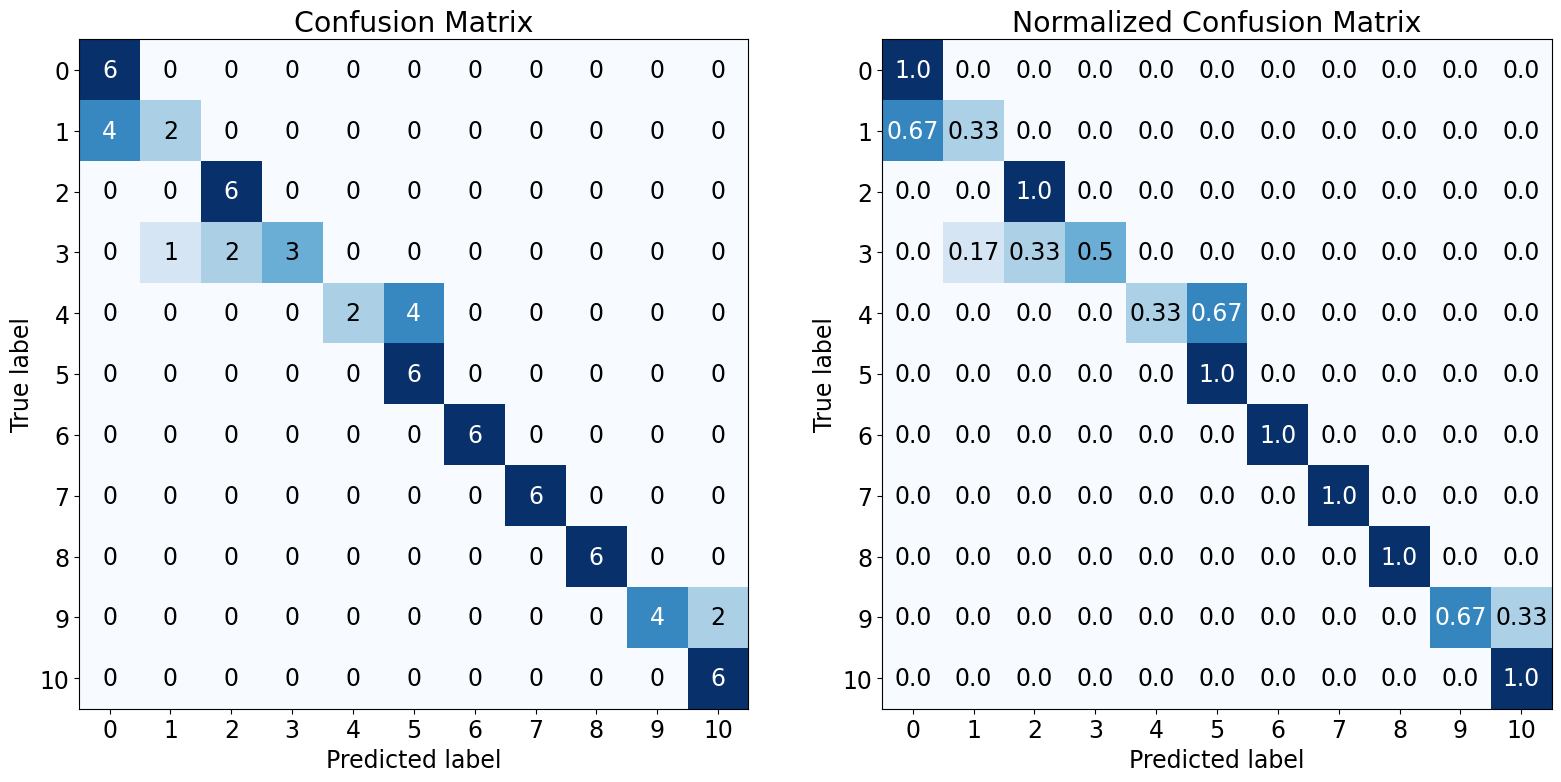

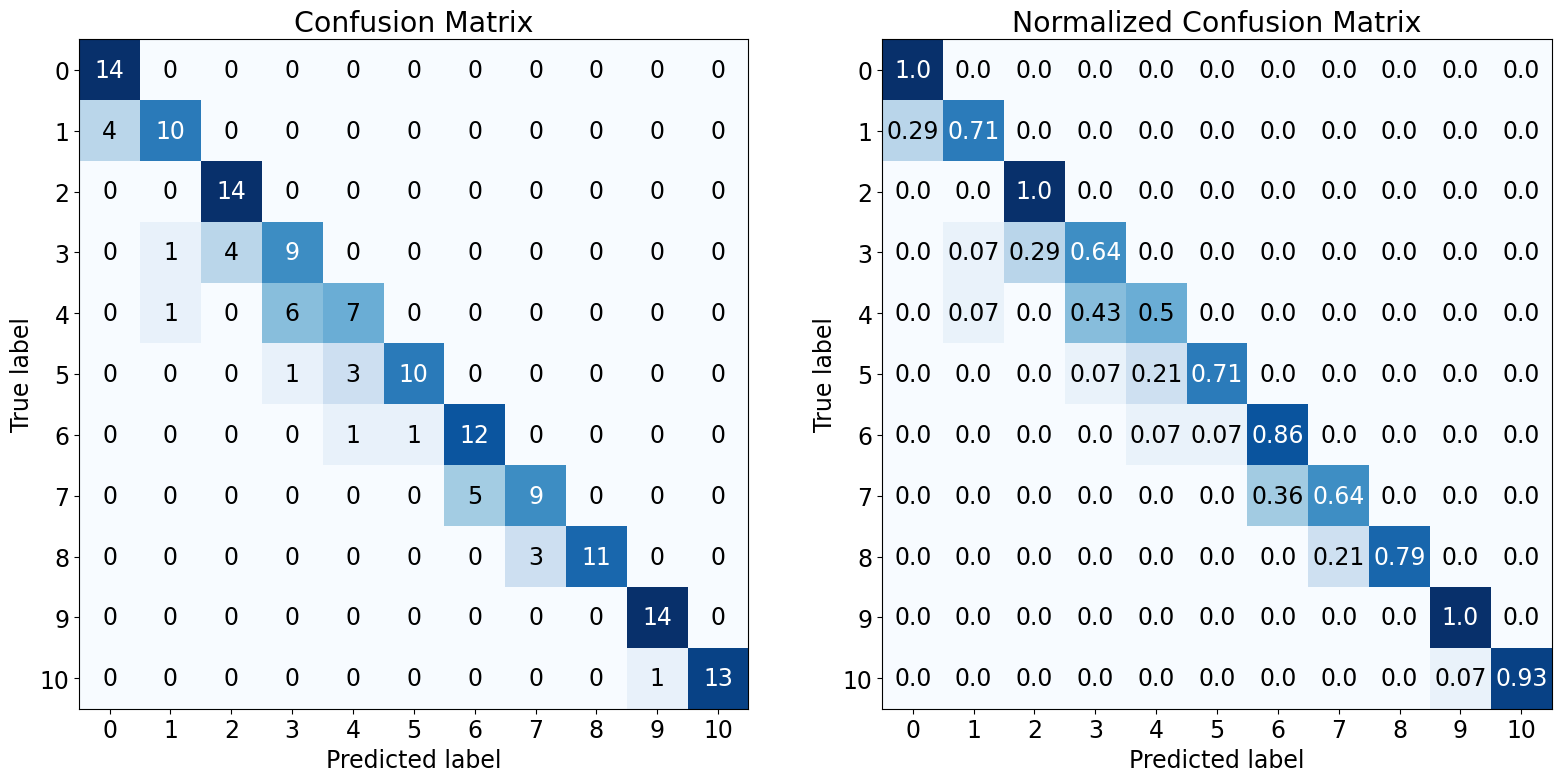

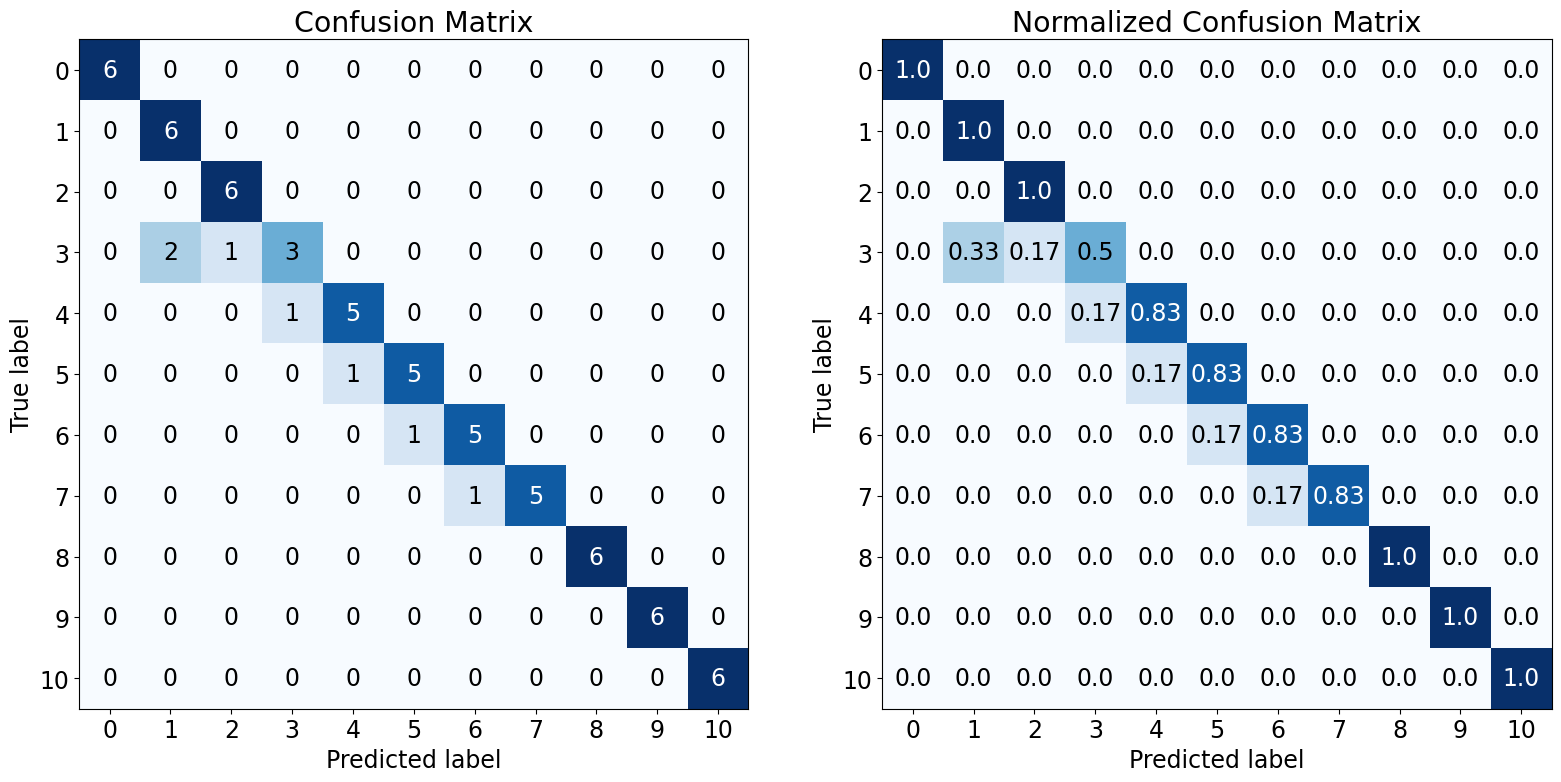

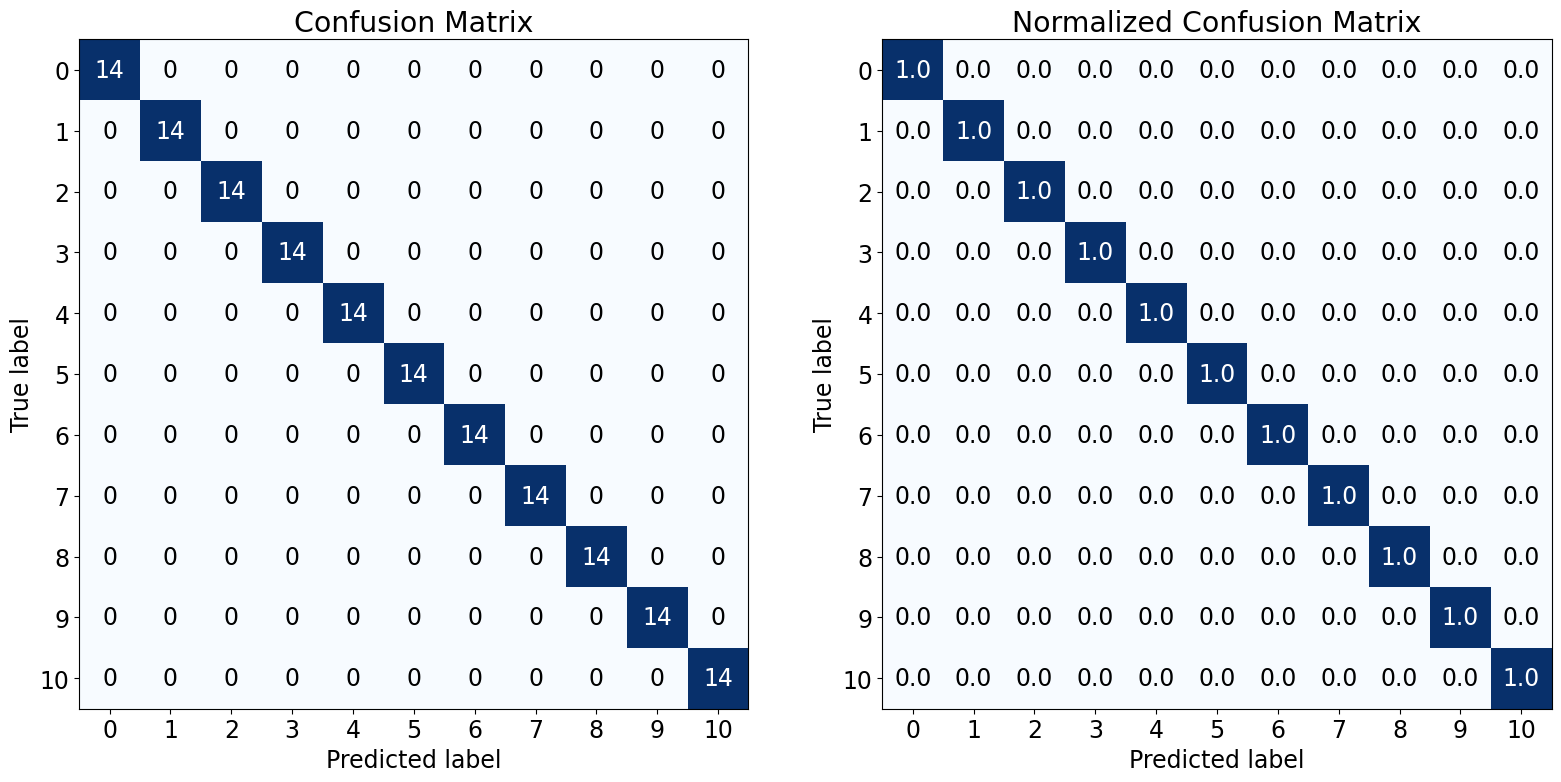

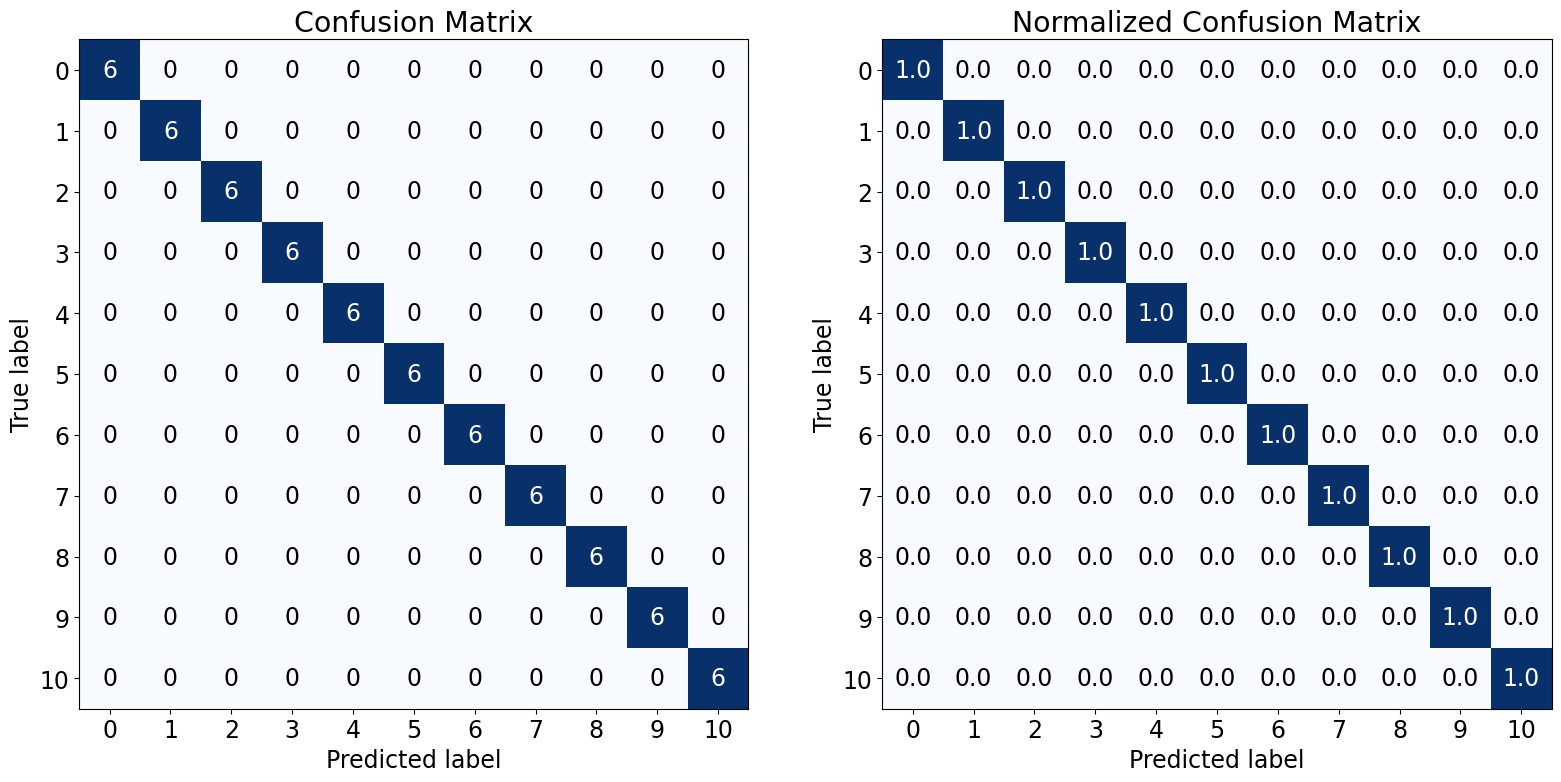

In [12]:
# This dataset can also be used for multi-classification task.

from qsi.cla import run_multiclass_clfs
dic_train_accs, dic_test_accs, html_str = run_multiclass_clfs(X, yc, clfs = 'all', split = .3, split_type = 'ks', cv_seed = 0, show = True)

from qsi.cla import visualize_multiclass_result
_ = visualize_multiclass_result(dic_train_accs, dic_test_accs)